<h1 style="color:black;text-align:center;font-size:300%;font-family:verdana;">
Exploration + Data Pre-Processing
</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

# Getting to know the Data 

In [3]:
data = pd.read_csv('tmdb_movies.csv')

In [4]:
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 11255, Columns: 24


In [5]:
data.head().T

,0,1,2,3,4
id,2,3,5,6,8
imdb_id,tt0094675,tt0092149,tt0113101,tt0107286,tt0825671
title,Ariel,Shadows in Paradise,Four Rooms,Judgment Night,Life in Loops (A Megacities RMX)
original_title,Ariel,Varjoja paratiisissa,Four Rooms,Judgment Night,Life in Loops (A Megacities RMX)
overview,A Finnish man goes to the city to find a job a...,"Nikander, a rubbish collector and would-be ent...",It's Ted the Bellhop's first night on the job....,"Four young friends, while taking a shortcut en...",Timo Novotny labels his new project an experim...
tagline,NaN,NaN,Twelve outrageous guests. Four scandalous requ...,Don't move. Don't whisper. Don't even breathe.,A Megacities remix.
status,Released,Released,Released,Released,Released
runtime,73,74,98,109,80
release_date,10/21/1988,10/17/1986,12/09/1995,10/15/1993,01/01/2006
budget,0,0,4000000,21000000,42000


In [6]:
data.columns

Index(['id', 'imdb_id', 'title', 'original_title', 'overview', 'tagline',
       'status', 'runtime', 'release_date', 'budget', 'revenue', 'popularity',
       'vote_average', 'vote_count', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'homepage', 'adult',
       'original_language', 'belongs_to_collection', 'poster_path',
       'backdrop_path'],
      dtype='object')

| #  | Feature                | Description                                                                 |
|----|------------------------|-----------------------------------------------------------------------------|
| 1  | id                     | Internal TMDb ID for the movie.                                            |
| 2  | imdb_id                | The movie’s IMDb ID linking to its IMDb page.                             |
| 3  | title                  | Localized title of the movie (English).                                   |
| 4  | original_title         | The original title of the movie in its native language.                   |
| 5  | overview               | A brief plot summary of the movie.                                        |
| 6  | tagline                | Short marketing phrase or slogan associated with the movie.               |
| 7  | status                 | Release status of the movie (e.g., Released, Post Production).            |
| 8  | runtime                | Duration of the movie in minutes.                                         |
| 9  | release_date           | The movie’s release date.                                                 |
| 10 | budget                 | The movie’s production budget in US dollars.                              |
| 11 | revenue                | Total worldwide revenue generated by the movie in US dollars.             |
| 12 | popularity             | Popularity score calculated by TMDb based on views, searches, and activity. |
| 13 | vote_average           | Average user rating for the movie (on a scale of 0–10).                   |
| 14 | vote_count             | Total number of user votes the movie has received.                        |
| 15 | genres                 | List of genres associated with the movie.                                 |
| 16 | production_companies   | List of companies that produced the movie, sorted by contribution.        |
| 17 | production_countries   | List of countries where the movie was produced, sorted by contribution.   |
| 18 | spoken_languages       | List of spoken languages featured in the movie.                           |
| 19 | homepage               | The official homepage URL of the movie, if available.                     |
| 20 | adult                  | Whether the movie is intended for adult audiences (True/False).           |
| 21 | original_language      | The original language the movie was made in.                              |
| 22 | belongs_to_collection  | Information about a collection or franchise the movie belongs to, if any.|
| 23 | poster_path            | Path to the movie’s promotional poster image on TMDb servers.             |
| 24 | backdrop_path          | Path to the movie’s backdrop image (background picture) on TMDb servers. |


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11255 entries, 0 to 11254
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     11255 non-null  int64  
 1   imdb_id                11131 non-null  object 
 2   title                  11255 non-null  object 
 3   original_title         11255 non-null  object 
 4   overview               11153 non-null  object 
 5   tagline                8900 non-null   object 
 6   status                 11255 non-null  object 
 7   runtime                11255 non-null  int64  
 8   release_date           11235 non-null  object 
 9   budget                 11255 non-null  int64  
 10  revenue                11255 non-null  int64  
 11  popularity             11255 non-null  float64
 12  vote_average           11255 non-null  float64
 13  vote_count             11255 non-null  int64  
 14  genres                 11190 non-null  object 
 15  pr

In [8]:
cols = ['runtime', 'budget', 'revenue', 'popularity', 'vote_average', 'vote_count']
pd.set_option('display.float_format', '{:.2f}'.format)
data[cols].describe().round(2)

,runtime,budget,revenue,popularity,vote_average,vote_count
count,11255.00,11255.00,11255.00,11255.00,11255.00,11255.00
mean,106.94,20657450.96,57607836.43,4.17,6.21,1494.72
std,25.04,35316958.62,145137607.56,6.94,1.32,3100.08
min,1.00,0.00,0.00,0.00,0.00,0.00
25%,93.00,1300000.00,1102878.50,1.31,5.75,66.00
50%,103.00,7500000.00,9600000.00,2.69,6.39,352.00
75%,118.00,25000000.00,46384473.00,4.88,6.99,1418.00
max,420.00,460000000.00,2923706026.00,390.45,10.00,37385.00


### 🔍 Insights from Initial Statistics – Things to Check Moving Forward

Based on the initial summary statistics, here are some things to check in the next steps of data cleaning and modeling:

- **Runtime**: Check for unrealistic values (e.g., movies with a runtime of 1 minute).
- **Budget**: Many entries have a value of 0 – check which rows actually contain meaningful budget data.
- **Revenue**: Same as budget – 0 values probably mean missing data, not actual zero revenue.
- **Popularity**: Very wide range – some values might be extreme outliers.
- **Vote Count**: Many movies have very few or 0 votes – consider filtering out these movies to get more reliable insights.


___________  
## 📌 Handling Missing or Incomplete Data

In [9]:
missing_summary = data.isnull().sum().to_frame('Missing Values')
missing_summary['Missing %'] = (100 * missing_summary['Missing Values'] / len(data)).round(2)
missing_summary = missing_summary.sort_values(by='Missing Values', ascending=False)

missing_summary[missing_summary['Missing Values'] > 0]

,Missing Values,Missing %
belongs_to_collection,8928,79.32
homepage,7917,70.34
tagline,2355,20.92
backdrop_path,650,5.78
production_companies,445,3.95
poster_path,197,1.75
production_countries,168,1.49
imdb_id,124,1.10
overview,102,0.91
spoken_languages,101,0.90


During the initial data exploration, we noticed several fields with missing or suspicious values.  
However, only after thoroughly analyzing the data throughout the notebook did we gain a better understanding of what constitutes:

- **Truly missing data** – information that is absent but *should* exist,  (e.g., a movie with no listed genres even though they exist on IMDb).
- **Garbage or noisy data** – values that exist but are incorrect (e.g., a budget of $0 for a blockbuster movie, or unrealistically high revenue).

This distinction is critical because:
> A missing value may signal lack of information,  
> whereas garbage data may mislead the analysis entirely if left untreated.


🔍 At this stage, we focus **only on identifying and handling missing data**.  

We chose to leave out garbage data (like strange values in budget or revenue) at this point.
These will be handled later, when we take a closer look at each feature separately.

### 📂 Examples of Truly Missing Data

In [10]:
#Genre
no_genre = data[data['genres'].isnull()]
display(no_genre[['title', 'genres']])


,title,genres
417,Janine F.,NaN
1856,De Arm Van Jezus,NaN
2038,Elated By Night,NaN
2136,Rich and Scary: Independent Soap Movie Experience,NaN
2139,Scenes from the Sex Struggles at North Beverly...,NaN
...,...,...
11133,Memories Lost and Found III,NaN
11156,Suwekus,NaN
11172,Stranger,NaN
11174,The Last Horror,NaN


In [11]:
print(f"Number of movies with missing genres: {len(no_genre)}")

Number of movies with missing genres: 65


#### 🎭 Missing Genres – Investigation and Decision

65 movies in the dataset have missing genre information (`NaN`).  
After reviewing several examples manually, we found that in many cases, these genres **do exist** on reliable sources like IMDb or TMDb.  
This means the missing values are not because the movie truly has no genre, but because the API response was incomplete or failed to provide the data.

Here are some examples:

- **"Super Bheem Toota Khush Tara"** – This animated short is listed with a genre on IMDb (Animation, Kids), but the genre is missing in our dataset.
- **"puli-part2"** – genre information available online.
- **"UFC 94: St-Pierre vs. Penn 2"** – A sports documentary with proper genre classification under "Sport" on IMDb.
- **"The Everyday Guide to Wine"** – Educational content that typically falls under "Documentary" or "Educational".
- **"PHOEBUS CARTEL: Live at MADE IN ESBJERG 2012"** – A musical performance, which still falls under genres like "Music" or "Concert" but is missing from our file.

These findings indicate that the `genres` column is **incomplete**, and not that the movies genuinely lack genre classification.
🧭 Therefore, we treat these cases as **truly missing data**.

#רעיון של עומרי להוסיף unk

In [12]:
#production_companies
no_proCompanies = data[data['production_companies'].isnull()]
display(no_proCompanies[['title', 'production_companies']])
print(f"Number of movies with missing production_companies: {len(no_proCompanies)}")

,title,production_companies
5,Sunday in August,NaN
149,Das Dorf der Freundschaft,NaN
164,Paradise Found,NaN
302,Mala Noche,NaN
381,Ghettokids - Brֳ¼der ohne Heimat,NaN
...,...,...
11212,Voids,NaN
11237,Abdullah from Minye,NaN
11239,Paragraph 78: Film Two,NaN
11248,Majaz: Ae Gham-e-Dil Kya Karun,NaN


Number of movies with missing production_companies: 445


#### 🏭 Production Companies – Missing or Not?

While exploring the `production_companies` column, we found 445 movies with `NaN` values (i.e., no production company listed).  
At first, this looked like missing data. However, after manually reviewing several of these titles on IMDb, we discovered that in many cases, **no production company is listed there either**.

These were typically:

- Old or archival films (e.g., *Sunday in August* (1949))
- Low-budget or student productions (e.g., *Abdullah from Minye*, *Voids*)
- Independent or self-funded foreign films (e.g., *Mala Noche* (1986), *Das Dorf der Freundschaft*)

This pattern led us to conclude: Although the field is technically empty (`NaN`), it **does not represent missing data** — it reflects the nature of the movie itself.
🛑 **Therefore, we chose not to treat these `NaN` values as missing data**.

In [13]:
#production countries
missing_countries = data[data['production_countries'].isnull()]
display(missing_countries[['title', 'production_countries']])
print(f"Number of movies with missing production countries: {len(missing_countries)}")

,title,production_countries
959,Regoch,NaN
1659,Bonsoir,NaN
1662,Home Sweet Home,NaN
1880,Before The Concert,NaN
5064,Commandments,NaN
...,...,...
11172,Stranger,NaN
11174,The Last Horror,NaN
11176,Super Bheem Toota Khush Tara,NaN
11239,Paragraph 78: Film Two,NaN


Number of movies with missing production countries: 168


#### 🌍 Missing Production Countries – Investigation and Decision

We found 168 movies with no production country listed in the `production_countries` column.  
after manually checking several titles (e.g., *Regoch*, *Bonsoir*, *Super Bheem Toota Khush Tara*),  
we verified that **this information is available on IMDb and other external sources**.

This confirms that These are cases of **truly missing data**, likely due to incomplete or failed API responses.

In [14]:
#spoken_language
missing_language = data[data['spoken_languages'].isnull()]
display(missing_language[['title', 'spoken_languages']])
print(f"Number of movies with missing spoken_languages: {len(missing_language)}")


,title,spoken_languages
1029,Apocalypto,NaN
1529,Fֳ¼r ein paar Filme mehr...,NaN
1876,Coda,NaN
1877,Prֳ©lude,NaN
2425,"Peter Voss, Thief of Millions",NaN
...,...,...
11164,Grossery Gang Putrid Power Movie,NaN
11193,Forklift Drivers from Hell,NaN
11216,Batman Beyond: Tech Wars / Disappearing Inque,NaN
11217,Adventures of Batman & Robin: Poison Ivy/The P...,NaN


Number of movies with missing spoken_languages: 101


#### 🗣️ Missing Spoken Languages – Investigation and Decision

We identified 101 movies with no value in the `spoken_languages` column (`NaN`). so once again we manually reviewed several of these titles on IMDb.

Examples include:

- *Apocalypto* – Known to feature the Yucatec Maya language
- *Elmo Loves You* – English language children’s special
- *Ten Canoes* – Features Yolŋu Matha and English
- *Sharky's Machine* – English-language crime film

✅ This confirms that these are cases of **truly missing data** — the information exists, but wasn’t properly retrieved.


In [15]:
#popularity
missing_popularity = data[data['popularity'] == 0]
display(missing_popularity[['title', 'popularity', 'release_date']])
print(f"Number of movies with missing popularity score: {len(missing_popularity)}")


,title,popularity,release_date
9950,The Adventures of Marshall Art,0.00,8/30/2003
9952,The Adventures of Marshall Art 3: The Two Mars...,0.00,8/30/2005
10195,sukma perkosa janda tua dan gila,0.00,NaN
10335,The Enemy Within,0.00,NaN
10533,FireClub,0.00,NaN
10543,Vaibhav Movie,0.00,NaN
10691,Madam Hurricane,0.00,6/23/2017
10899,The Everyday Guide to Wine,0.00,04/05/2010
11122,Kemis Yelebesku'let,0.00,01/12/2014
11133,Memories Lost and Found III,0.00,11/08/2017


Number of movies with missing popularity score: 11


#### ⭐ Missing Popularity – Investigation and Decision

We identified 11 movies with a `popularity` score of **0.00**.  

- *The Everyday Guide to Wine* – Educational content, likely not rated widely
- *The Adventures of Marshall Art* – Very obscure, with limited public reach
- *Stranger*, *FireClub*, *Vaibhav Movie* – Found on IMDb but with minimal presence, views, or reviews

✅ These findings suggest that while the popularity value is low, it is **not missing or invalid**.  
These movies **do exist on IMDb** and their low score likely reflects their limited exposure or niche audience (e.g., educational content, independent releases).

🎯 Since the `popularity` metric (which we will explain later in detail) is calculated based on multiple factors like views, ratings, and votes,  
we concluded that a score of 0.00 in this case **represents valid but very low popularity**, not a lack of data.



In [16]:
# vote_count and vote_average

missing_voteCount = data[data['vote_count'] == 0]
display(missing_voteCount[['title','original_title', 'vote_count', 'vote_average', 'release_date']])
print(f"Number of movies with missing vote_count and vote_average score: {len(missing_voteCount)}")


,title,original_title,vote_count,vote_average,release_date
978,Singendes Wasser,Singendes Wasser,0,0.00,01/01/2007
1459,Cedric,Cedric,0,0.00,01/01/2006
1464,"I Love You, Baby","I Love You, Baby",0,0.00,4/20/2000
1503,Wirklich alles?!,Wirklich alles?!,0,0.00,11/30/2002
1506,The Battle of The Alamo,The Battle of The Alamo,0,0.00,03/09/1996
...,...,...,...,...,...
11225,Darinda,Darinda,0,0.00,12/09/2005
11226,Duplicate Jaani Dushman,Duplicate Jaani Dushman,0,0.00,09/05/2003
11233,Chanel,״´†„,0,0.00,10/18/2017
11251,Gonjeshkake ashi mashi,Gonjeshkake ashi mashi,0,0.00,01/09/2018


Number of movies with missing vote_count and vote_average score: 206


#### 🗳️ Missing Vote Count & Vote Average – Investigation and Decision

We found 206 movies with both `vote_count = 0` and `vote_average = 0.00`.  
Since the average rating is only meaningful when there are actual votes, the two are directly connected.

To determine whether these zeros represent truly unrated movies or missing data,  
we manually checked several examples in external sources like IMDb:

- *Freaks & Errors: A Rare Collection* – Has a rating of 7.2 based on 40 votes  
- *Darinda* – Has a rating of 7.0 based on 20 votes

✅ These examples show that ratings **do exist**, but were not retrieved in our dataset.  
We treat `vote_count = 0` and `vote_average = 0.00` as **truly missing data**.  


In [17]:
# release_date

In [18]:
data['release_date'].astype(str).str.extract(r'([-/])')[0].value_counts()

0
/    11233
-        2
Name: count, dtype: int64

In [19]:
date_dash = data['release_date'].astype(str).str.contains('-', na=False)
data.loc[date_dash, 'release_date'] = pd.to_datetime(data.loc[date_dash, 'release_date'], format='%Y-%m-%d')

data.loc[~date_dash, 'release_date'] = pd.to_datetime(data.loc[~date_dash, 'release_date'], errors='coerce')

data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

In [20]:
data['release_date'].head(10)

0   1988-10-21
1   1986-10-17
2   1995-12-09
3   1993-10-15
4   2006-01-01
5   2004-09-02
6   1977-05-25
7   2003-05-30
8   1994-06-23
9   1999-09-15
Name: release_date, dtype: datetime64[ns]

In [21]:
# release_date
missing_date = data[data['release_date'].isnull()]
display(missing_date[['title', 'release_date']])
print(f"Number of movies with missing release_date: {len(missing_date)}")


,title,release_date
7804,Oerend Heerschend,NaT
8540,GOECHA LA: In search of the Holy Kangchenjunga...,NaT
8565,PHOEBUS CARTEL: Live at MADE IN ESBJERG 2012,NaT
8612,The Pursuit Of Victory,NaT
10170,puli-part2,NaT
10195,sukma perkosa janda tua dan gila,NaT
10242,Street Team Miami,NaT
10305,Zoo Escape,NaT
10335,The Enemy Within,NaT
10514,Ghosts of Shepherdstown,NaT


Number of movies with missing release_date: 20


#### 📅 Missing Release Date – Investigation and Decision

We identified 20 movies with a missing `release_date` (`NaN`).  
We found that for some movies — such as *Zoo Escape* and *Blood on the Leaves* —  
**release date information does not exist online at all**, not even on IMDb.

📌 **Conclusion**:  
Since the release date is a critical feature for time-based analysis and sorting,  
we decided to **exclude all movies with missing `release_date`** from the dataset at this stage.  
We will move forward only with entries that include a known and valid release date.


In [22]:
# Remove rows with missing release_date
data = data[data['release_date'].notnull()].copy()

In [23]:
#budget and revenue
print("Number of movies with zero budget:", (data['budget'] == 0).sum())
print("Number of movies with zero revenue:", (data['revenue'] == 0).sum())
print("Number of movies with both zero budget and zero revenue:", ((data['budget'] == 0) & (data['revenue'] == 0)).sum())
print("Number of movies with both zero budget or zero revenue:", ((data['budget'] == 0) | (data['revenue'] == 0)).sum())

Number of movies with zero budget: 893
Number of movies with zero revenue: 875
Number of movies with both zero budget and zero revenue: 745
Number of movies with both zero budget or zero revenue: 1023


In [24]:
both_zero = data[(data['budget'] == 0) & (data['revenue'] == 0)]
print("Examples of movies with zero budget and zero revenue:")
display(both_zero[['title', 'budget', 'revenue']].head(10))

Examples of movies with zero budget and zero revenue:


,title,budget,revenue
0,Ariel,0,0
1,Shadows in Paradise,0,0
5,Sunday in August,0,0
56,Land Without Bread,0,0
57,Megacities,0,0
59,Kunstgriff,0,0
67,Open Hearts,0,0
88,No End,0,0
89,Railway Station,0,0
90,Short Working Day,0,0


#### 💸 Missing Budget and Revenue – Conclusion

Many movies have both `budget = 0` and `revenue = 0`.  
After checking examples like *Sunday in August* (1949), *Land Without Bread* (1933), and *Shadows in Paradise* (1986),  
we found that this data **doesn't exist even on IMDb**, usually because these are **very old or independent films**.

📌 Therefore, we treat these cases as **missing data**, not true zero values,  
and include them in our missingness score.


___
#### ✅ Final Summary – Handling Missing Data

After thoroughly investigating the key features in our dataset,  
we carefully examined whether each case represents **truly missing data** or simply valid low values.  
This distinction was only possible after becoming deeply familiar with the structure, context, and meaning of the data.

To ensure we can draw meaningful insights and build reliable models,  
we decided to work only with data that is as complete and high-quality as possible.

📌 Therefore, we adopted a **scoring-based approach**:  
Each record will receive a **missingness score** based on how much critical information is missing.  
These criteria were defined only after gaining a full understanding of what *really* counts as missing.

This strategy allows us to:

- Quantify the completeness of each record  
- Identify which entries should be removed or handled 
- Preserve only useful, trustworthy data going forward

We believe this targeted approach leads to a much cleaner and more reliable dataset for the next stages of the project.



In [25]:
# Step 1: Initialize score column
data['missingness_score'] = 0

# Step 2: Add points based on missing/invalid fields
data.loc[data['genres'].isnull(), 'missingness_score'] += 1
data.loc[data['production_countries'].isnull(), 'missingness_score'] += 1
data.loc[data['spoken_languages'].isnull(), 'missingness_score'] += 1
data.loc[data['vote_average'] == 0, 'missingness_score'] += 1
data.loc[(data['revenue'] == 0) | (data['budget'] == 0), 'missingness_score'] += 2

# Step 3: Create DataFrame with score distribution
score_distribution = data['missingness_score'].value_counts().sort_index()
score_df = pd.DataFrame({
    'Missingness Score': score_distribution.index,
    'Number of Records': score_distribution.values
})
score_df['Percentage'] = (score_df['Number of Records'] / len(data) * 100).round(2)

# Display the table
print(score_df)


   Missingness Score  Number of Records  Percentage
0                  0               9953       88.59
1                  1                190        1.69
2                  2                970        8.63
3                  3                 98        0.87
4                  4                 21        0.19
5                  5                  2        0.02
6                  6                  1        0.01


In [26]:
# ✅ Our decision: keep only records with a missingness_score of 0
# These are the most complete and reliable records, with no missing or suspicious values
# This ensures high-quality data for the next steps of the analysis or modeling

# Print number of records before removing incomplete rows
print(f"Number of records before removal: {len(data)}")

# Update the main DataFrame to contain only complete entries
data = data[data['missingness_score'] == 0].copy()

# Print number of records after removal
print(f"Number of records after removal: {len(data)}")


Number of records before removal: 11235
Number of records after removal: 9953


___________
# 🧹 Data Pre-Processing Plan

- **backdrop_path**: Drop — not useful.
- **poster_path**: Drop — not useful.
- **overview**: Drop — not useful.
   
- **tagline**: Transform to binary (0/1) — indicates if the movie has a tagline or not.
- **homepage**: Transform to binary (0/1) — indicates if the movie has an internet homepage.
    

In [27]:
data = data.drop(["backdrop_path", "poster_path", "overview"], axis=1)

data['has_tagline'] = data['tagline'].notnull().astype(int)
# 1 = the movie has a tagline
# 0 = the movie does not have a tagline

data['has_homepage'] = data['homepage'].notnull().astype(int)
# 1 = the movie has a homepage
# 0 = the movie does not have a homepage

data.drop(['tagline', 'homepage'], axis=1, inplace=True)

 ___________
## 🆔 Unique Movie Identifiers Analysis

In [28]:
print(f"Total movies: {data.shape[0]}")

Total movies: 9953


In [29]:
# Display sample of movies with missing imdb_id
print(data[data['imdb_id'].isnull()][['title', 'imdb_id']].head(10))

                                                  title imdb_id
5943                    The Decline And Fall Of America     NaN
8337                              Ambasamuthiram Ambani     NaN
8501                   Barbet : L'Homme de la situation     NaN
8562                        Gangs of Wasseypur - Part 2     NaN
9291                                         After Life     NaN
9431         Short Stack Live at the Sydney Opera House     NaN
9461  SoundStage Presents: Robert Plant And The Stra...     NaN
9476                                            Lambada     NaN
9699                                       Rock Sangkut     NaN
9750                                      Be Astonished     NaN


In [30]:
print(f"Number of movies with missing imdb_id: {data['imdb_id'].isnull().sum()}")
print(f"Number of movies with missing id: {data['id'].isnull().sum()}")


Number of movies with missing imdb_id: 25
Number of movies with missing id: 0


In [31]:
# Display sample of movies with missing imdb_id
print(data[data['imdb_id'].isnull()][['title', 'imdb_id']].head(10))

                                                  title imdb_id
5943                    The Decline And Fall Of America     NaN
8337                              Ambasamuthiram Ambani     NaN
8501                   Barbet : L'Homme de la situation     NaN
8562                        Gangs of Wasseypur - Part 2     NaN
9291                                         After Life     NaN
9431         Short Stack Live at the Sydney Opera House     NaN
9461  SoundStage Presents: Robert Plant And The Stra...     NaN
9476                                            Lambada     NaN
9699                                       Rock Sangkut     NaN
9750                                      Be Astonished     NaN


27 movies have a missing `imdb_id`, while the internal `id` field is complete.  
To keep the data consistent and avoid duplicates, we decided to rely only on the API `id`.

In [32]:
data.drop(columns=['imdb_id'], inplace=True)

 ___________
## 🎬 Movie Titles Exploration #1

In [33]:
# movies can have the same title but be different movies (remakes, reboots, etc...)
# to check if there are any 'real' duplicates (not just movies with the same name)
# we will group by 'title' and 'release_date' and check if there are any duplicates
duplicate_groups = data.groupby(['title', 'release_date']).size()

true_duplicates = duplicate_groups[duplicate_groups > 1]
print(f"Number of true duplicates: {true_duplicates.shape[0]}")

Number of true duplicates: 0


In [34]:
# movies with a 'unique' title
data.groupby('title').filter(lambda x: len(x) == 1).shape[0]

9401

In [35]:
# movies with the same titles
dup_titles = data.groupby('title').filter(lambda x: len(x) > 1)
dup_titles.shape[0]

552

In [36]:
# movies whose title appears more than once
dup_titles['title'].value_counts().count()

265

In [37]:
dup_titles.sort_values('title').head(8)


,id,title,original_title,status,runtime,release_date,budget,revenue,popularity,vote_average,...,genres,production_companies,production_countries,spoken_languages,adult,original_language,belongs_to_collection,missingness_score,has_tagline,has_homepage
6218,30266,"20,000 Leagues Under the Sea","20,000 Leagues Under the Sea",Released,99,1916-12-24,200000,8000000,1.24,6.20,...,"Adventure, Drama, Action, Science Fiction",The Universal Film Mfg. Co.,"Bahamas, United States of America",No Language,False,en,NaN,0,1,0
134,173,"20,000 Leagues Under the Sea","20,000 Leagues Under the Sea",Released,127,1954-12-23,5000000,28200000,3.09,7.00,...,"Adventure, Science Fiction, Family",Walt Disney Productions,United States of America,English,False,en,NaN,0,1,0
10144,348750,8 Seconds,8 Seconds,Released,120,2015-02-27,5556000,1759935,0.70,6.90,...,Drama,"BKM, Barefoot Films, Bֳ¶cek Film, Galata Film,...","Germany, Turkey","German, Turkish",False,de,NaN,0,0,0
5237,18069,8 Seconds,8 Seconds,Released,105,1994-02-25,7000000,19623396,1.12,7.30,...,"Drama, Romance, Western","New Line Cinema, Jersey Films",United States of America,"English, French",False,en,NaN,0,1,0
297,377,A Nightmare on Elm Street,A Nightmare on Elm Street,Released,91,1984-11-09,1800000,57004513,28.02,7.33,...,Horror,"New Line Cinema, Smart Egg Pictures, Media Hom...","United States of America, United Kingdom",English,False,en,A Nightmare on Elm Street Collection,0,1,0
5711,23437,A Nightmare on Elm Street,A Nightmare on Elm Street,Released,95,2010-04-30,35000000,115664037,3.45,5.52,...,"Horror, Mystery, Thriller","Platinum Dunes, New Line Cinema, Warner Bros. ...",United States of America,English,False,en,NaN,0,1,1
2052,3111,A Star Is Born,A Star Is Born,Released,176,1954-10-01,5019770,12000000,1.67,7.12,...,"Drama, Music, Romance","Transcona Enterprises, Warner Bros. Pictures",United States of America,English,False,en,NaN,0,1,0
5655,22692,A Star Is Born,A Star Is Born,Released,111,1937-04-27,1200000,2370000,0.97,7.10,...,"Drama, Romance",Selznick International Pictures,United States of America,English,False,en,NaN,0,1,0


#### Duplicate Titles Are Not Duplicate Movies

Some movies share the same title but are clearly different entries.  
For example, **"8 Seconds"** appears twice — once with release year **1994** and ID **18069**, and again with release year **2015** and ID **348750**.  
This shows that identical titles can refer to completely different movies (e.g., remakes or unrelated films), so **title should not be used as a unique identifier**.


In [38]:
# added a feature that tells us how many more movies in our data have the same title
data['num_same_title'] = data.groupby('title')['title'].transform('count')

In [39]:
print(data['num_same_title'].value_counts().sort_index())


num_same_title
1    9401
2     492
3      48
4      12
Name: count, dtype: int64


 ___________
## 🎬 Movie Titles Exploration #2

In [40]:
# checking for movies that changed their title
changed_title = data[data['title'] != data['original_title']]
changed_title

,id,title,original_title,status,runtime,release_date,budget,revenue,popularity,vote_average,...,production_companies,production_countries,spoken_languages,adult,original_language,belongs_to_collection,missingness_score,has_tagline,has_homepage,num_same_title
13,18,The Fifth Element,Le Cinquiֳ¨me ֳ‰lֳ©ment,Released,126,1997-05-02,90000000,263920180,16.25,7.55,...,Gaumont,France,"English, Swedish, German",False,fr,NaN,0,1,1,1
20,26,Walk on Water,LaLehet Al HaMayim,Released,103,2004-02-05,1400000,444,1.83,6.90,...,"Lama Films, United King Films","Israel, Sweden","English, Arabic, Hebrew, German, Turkish, Italian",False,he,NaN,0,1,1,1
26,55,Amores Perros,Amores perros,Released,154,2000-06-16,2000000,20908467,6.28,7.62,...,"Altavista Films, Zeta Film",Mexico,Spanish,False,es,NaN,0,1,0,1
45,79,Hero,ט‹±י›„,Released,99,2002-07-22,31000000,177394432,6.23,7.50,...,"Beijing New Picture Film Co. Ltd., China Film ...","Hong Kong, China",Mandarin,False,zh,NaN,0,1,0,1
47,81,Nausicaֳ₪ of the Valley of the Wind,י¢¨ד®ט°·ד®דƒד‚¦ד‚·ד‚«,Released,117,1984-03-11,1000000,9016411,9.98,7.95,...,Topcraft,Japan,Japanese,False,ja,NaN,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244,502090,Seven Awkward Sex Scenes. Part One,Septiֵ†as neveikla seksa reizes. Pirmִ daִ¼a,Released,26,2018-03-15,1000,1000,0.30,5.00,...,"Tritone Studios, Latvijas Kultֵ«ras akadִ“mija",Latvia,Latvian,False,lv,NaN,0,0,0,1
11246,502372,Zabih,״°״¨״­,Released,90,1975-02-02,15000,1500000,0.21,3.30,...,"Iranian Independents, Siera Film",Iran,Persian,False,fa,NaN,0,0,0,1
11250,502913,Swingers,׀¡׀²ׁ–׀½׀³׀µׁ€׀¸,Released,97,2018-03-28,100000,850000,0.44,4.53,...,"F Films, Platforma Filma, Cinevilla Studio","Latvia, Ukraine",Ukrainian,False,uk,Swingers Collection,0,0,0,2
11253,503115,Azar,״¢״°״±,Released,93,2017-02-01,10000,10000,0.46,3.70,...,NaN,Iran,Persian,False,fa,NaN,0,0,0,1


In [41]:
changed_title_count = changed_title.shape[0]
print(f"Number of movies that changed titles from original: {changed_title_count}")

Number of movies that changed titles from original: 1776


In [42]:
# percentage of movies that changed their title - out of all movies
print(f"Percentage of movies that changed titles from original: {changed_title_count * 100 / data.shape[0]}")


Percentage of movies that changed titles from original: 17.843866171003718


In [43]:
# movies that original title is not in English - translated movies
trans_title = changed_title[changed_title['original_language'] != 'en']
trans_title

,id,title,original_title,status,runtime,release_date,budget,revenue,popularity,vote_average,...,production_companies,production_countries,spoken_languages,adult,original_language,belongs_to_collection,missingness_score,has_tagline,has_homepage,num_same_title
13,18,The Fifth Element,Le Cinquiֳ¨me ֳ‰lֳ©ment,Released,126,1997-05-02,90000000,263920180,16.25,7.55,...,Gaumont,France,"English, Swedish, German",False,fr,NaN,0,1,1,1
20,26,Walk on Water,LaLehet Al HaMayim,Released,103,2004-02-05,1400000,444,1.83,6.90,...,"Lama Films, United King Films","Israel, Sweden","English, Arabic, Hebrew, German, Turkish, Italian",False,he,NaN,0,1,1,1
26,55,Amores Perros,Amores perros,Released,154,2000-06-16,2000000,20908467,6.28,7.62,...,"Altavista Films, Zeta Film",Mexico,Spanish,False,es,NaN,0,1,0,1
45,79,Hero,ט‹±י›„,Released,99,2002-07-22,31000000,177394432,6.23,7.50,...,"Beijing New Picture Film Co. Ltd., China Film ...","Hong Kong, China",Mandarin,False,zh,NaN,0,1,0,1
47,81,Nausicaֳ₪ of the Valley of the Wind,י¢¨ד®ט°·ד®דƒד‚¦ד‚·ד‚«,Released,117,1984-03-11,1000000,9016411,9.98,7.95,...,Topcraft,Japan,Japanese,False,ja,NaN,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244,502090,Seven Awkward Sex Scenes. Part One,Septiֵ†as neveikla seksa reizes. Pirmִ daִ¼a,Released,26,2018-03-15,1000,1000,0.30,5.00,...,"Tritone Studios, Latvijas Kultֵ«ras akadִ“mija",Latvia,Latvian,False,lv,NaN,0,0,0,1
11246,502372,Zabih,״°״¨״­,Released,90,1975-02-02,15000,1500000,0.21,3.30,...,"Iranian Independents, Siera Film",Iran,Persian,False,fa,NaN,0,0,0,1
11250,502913,Swingers,׀¡׀²ׁ–׀½׀³׀µׁ€׀¸,Released,97,2018-03-28,100000,850000,0.44,4.53,...,"F Films, Platforma Filma, Cinevilla Studio","Latvia, Ukraine",Ukrainian,False,uk,Swingers Collection,0,0,0,2
11253,503115,Azar,״¢״°״±,Released,93,2017-02-01,10000,10000,0.46,3.70,...,NaN,Iran,Persian,False,fa,NaN,0,0,0,1


In [44]:
trans_title_count = trans_title.shape[0]
print(f"Number of movies that titles have been translated to English: {trans_title_count}")

Number of movies that titles have been translated to English: 1742


In [45]:
# percentage of movies that were translated - out of all movies that changed their title
print(f"Percentage of movies that titles have been translated to English, out of changed titled movies: {trans_title_count * 100 / changed_title_count}")

Percentage of movies that titles have been translated to English, out of changed titled movies: 98.08558558558559


In [46]:
# movies that changed their title and the original title is in English - not translated movies
no_trans_title = changed_title[changed_title['original_language'] == 'en']
no_trans_title.head(10)

,id,title,original_title,status,runtime,release_date,budget,revenue,popularity,vote_average,...,production_companies,production_countries,spoken_languages,adult,original_language,belongs_to_collection,missingness_score,has_tagline,has_homepage,num_same_title
1350,1997,Two Brothers,Deux Frֳ¨res,Released,109,2004-04-07,74500000,62172050,1.75,7.11,...,"TF1 Films Production, Pathֳ©, Two Brothers Pic...","France, United Kingdom","English, French, Thai",False,en,NaN,0,1,0,1
1964,3009,The Trial,Le Procֳ¨s,Released,119,1962-12-21,1300000,94243,3.64,7.42,...,"Hisa-Film, Paris-Europa Productions, Finanziar...","France, Germany, Italy",English,False,en,NaN,0,1,0,1
2247,4407,The Three Investigators in The Secret of Skele...,Die drei ??? - Das Geheimnis der Geisterinsel,Released,91,2007-11-07,11000000,7800000,2.26,6.05,...,"GFP Medienfonds, Studio Hamburg International ...",Germany,German,False,en,The Three Investigators Collection,0,0,0,1
3314,10047,The Messenger: The Story of Joan of Arc,Joan of Arc,Released,158,1999-10-27,85000000,66976317,4.68,6.38,...,Gaumont,France,"English, Latin",False,en,NaN,0,0,1,1
4411,12653,Romasanta: The Werewolf Hunt,Romasanta,Released,90,2004-05-13,4500000,432671,0.56,5.00,...,"Future Films, Filmax, CGAI: Centro Galego de A...","Spain, United Kingdom",English,False,en,NaN,0,0,0,1
4783,14499,Mio in the Land of Faraway,Mio min Mio,Released,99,1987-07-01,7200000,2300000,1.22,6.00,...,"Nordisk Tonefilm, Gorky Film Studios, Svenska ...","Norway, Soviet Union, Sweden",English,False,en,NaN,0,1,0,1
4898,15208,Bathory: Countess of Blood,Bathory,Released,141,2008-07-10,17610801,7005528,2.33,5.58,...,"J&J JAKUBISKO FILM EUROPE Production s.r.o., E...","United Kingdom, Hungary, Slovakia, France, Cze...",English,False,en,NaN,0,0,0,1
5070,16427,A Day Without a Mexican,Un dֳ­a sin mexicanos,Released,98,2004-05-14,1500000,10057021,3.29,5.90,...,"Televisa, Eye On The Ball Films, Instituto Mex...","Mexico, Spain, United States of America","Spanish, English",False,en,NaN,0,1,1,1
6705,38850,Stolen,Stolen Lives,Released,97,2009-10-10,2000000,7306,4.04,5.90,...,"Boy in the Box, Capitol Films, 2 Bridges Produ...",United States of America,English,False,en,NaN,0,1,1,2
6756,39806,Princess Kaiulani,Princess Ka'iulani,Released,130,2010-05-14,9000000,771499,1.17,5.70,...,"Island Film Group, Trailblazer Films, Screen East",United States of America,English,False,en,NaN,0,1,1,1


##### 💡**Insight** - We see that even though the original movie language is English, the original titles are mostly still in a different language, so we can generalize (disregarding the very few that are different) and say that movies that changed their titles are translated movies.

In [47]:
data['changed_title'] = data['title'] != data['original_title']
data['changed_title'].value_counts()

changed_title
False    8177
True     1776
Name: count, dtype: int64

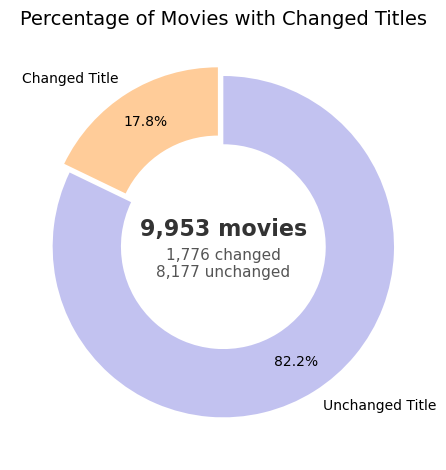

In [48]:
changed_title_count = data['changed_title'].sum()
total_movies = len(data)
unchanged_count = total_movies - changed_title_count

labels = ['Changed Title', 'Unchanged Title']
sizes = [changed_title_count, unchanged_count]
colors = ['#ffcc99', '#c2c2f0']
explode = (0.06, 0)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops=dict(width=0.4), # Donut chart
    pctdistance=0.8
)

# Add count ratio in the center
ax.text(
    0, 0.1,
    f"{total_movies:,} movies",
    ha='center', va='center',
    fontsize=16, weight='bold', color='#333333'
)
ax.text(
    0, -0.1,
    f"{changed_title_count:,} changed\n{unchanged_count:,} unchanged",
    ha='center', va='center',
    fontsize=11, color='#555555'
)


ax.set_title("Percentage of Movies with Changed Titles", fontsize=14)
plt.tight_layout()
plt.show()

In [49]:
data.drop(columns=['original_title'], inplace=True)

 ___________
## 🔞 Adult Content Classification

In [50]:
data['adult'].value_counts()

adult
False    9953
Name: count, dtype: int64

In [51]:
# Dropped the 'adult' column since all values are False — it doesn't provide any useful information.
data.drop(columns=['adult'], inplace=True)

___________  
## 🎭 Genre Analysis and Distribution

In [52]:
data['genres'].value_counts()

genres
Drama                                                    669
Comedy                                                   537
Drama, Romance                                           374
Comedy, Romance                                          299
Comedy, Drama                                            290
                                                        ... 
Family, Animation, Comedy, Fantasy, Adventure              1
Drama, History, Mystery                                    1
Animation, Science Fiction, Adventure, Fantasy, Music      1
Science Fiction, Horror, Drama                             1
Action, Science Fiction, Animation                         1
Name: count, Length: 2057, dtype: int64

In [53]:
print(f"Total number of combinations of genres: {data['genres'].value_counts().count()}")

Total number of combinations of genres: 2057


#### Due to there being so many different combinations of genres, we have decided that the wisest option would be to create multi-labels (bools) for each genre and also count how many genres each movie has.
#### On the one hand this creates a lot more features for our data but on the other hand this is the best way to later evaluate ML models and Clustering.

In [54]:
# separating multiple genres into separate rows
data['num_genres'] = data['genres'].apply(
    lambda x: len([genre.strip() for genre in x.split(',')]) if isinstance(x, str) and x.strip() != '' else 0
)

min_genres = data['num_genres'].min()
max_genres = data['num_genres'].max()
median_genres = data['num_genres'].median()

print(f"Each movie has between {min_genres} and {max_genres} genres, with a median of {median_genres} genres per movie.")

Each movie has between 1 and 7 genres, with a median of 3.0 genres per movie.


## Multi-Label Creation:

In [55]:
def cat_list_comma_separated_column(df: pd.DataFrame, column_name: str, null_value: str = 'unknown') -> pd.DataFrame:
    df[column_name] = df[column_name].fillna(null_value)
    df[column_name] = df[column_name].apply(lambda x: [item.strip() for item in x.split(',') if item.strip()] 
                                          if x != null_value else [null_value])
    df["main_"+column_name] = df[column_name].apply(lambda x: x[0] if len(x) > 0 else null_value)
    df[column_name+"_count"] = df[column_name].apply(lambda x: len(x))
    df.drop(columns=[column_name], inplace=True, axis=1)
    df[column_name+"_count"] = df[column_name+"_count"].astype(np.int8)
    df["main_"+column_name] = df["main_"+column_name].astype('category')
    
    return df

In [56]:
# testing to see how many unique genres we have in the dataset
total_genre_count = 0

data['genres_list'] = data['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')] if isinstance(x, str) else [])

all_genres = set(genre for sublist in data['genres_list'] for genre in sublist)

# make main genre column
data["main_genre"] = data["genres_list"].apply(lambda x: x[0] if len(x) > 0 else "unknown")

# For each genre, create a new column with True/False
for genre in all_genres:
    total_genre_count += 1
    data[genre] = data['genres_list'].apply(lambda genres: genre in genres)

# Drop the helper 'genres_list' column
data.drop(columns=['genres_list'], inplace=True)

print(f"Total number of individual unique genres: {total_genre_count}")

Total number of individual unique genres: 19


In [57]:
data.drop(columns=['genres'], inplace=True)

In [58]:
data[0:5].T

,2,3,6,7,8
id,5,6,11,12,13
title,Four Rooms,Judgment Night,Star Wars,Finding Nemo,Forrest Gump
status,Released,Released,Released,Released,Released
runtime,98,109,121,100,142
release_date,1995-12-09 00:00:00,1993-10-15 00:00:00,1977-05-25 00:00:00,2003-05-30 00:00:00,1994-06-23 00:00:00
budget,4000000,21000000,11000000,94000000,55000000
revenue,4257354,12136938,775398007,940335536,677387716
popularity,6.08,3.15,49.07,19.01,26.91
vote_average,5.90,6.46,8.20,7.82,8.47
vote_count,2687,349,21079,19605,28122


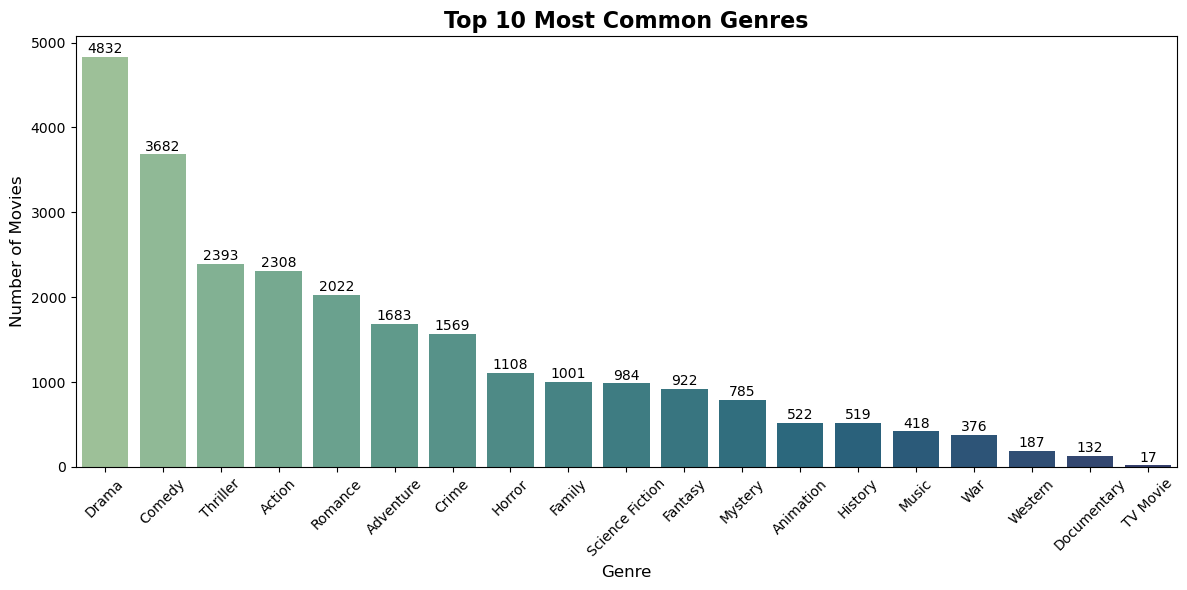

In [59]:
genre_columns = [
    col for col in data.columns
    if col in ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
               'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 
               'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 
               'TV Movie', 'Thriller', 'War', 'Western', 'Unknown genre']
]

top_genres = data[genre_columns].sum().sort_values(ascending=False)
colors = sns.color_palette("crest", len(top_genres))


plt.figure(figsize=(12, 6))
plt.grid(False)

ax = sns.barplot(x=top_genres.index, y=top_genres.values, palette=colors)
plt.title('Top 10 Most Common Genres', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)

for i, value in enumerate(top_genres.values):
    ax.text(i, value + 10, str(int(value)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

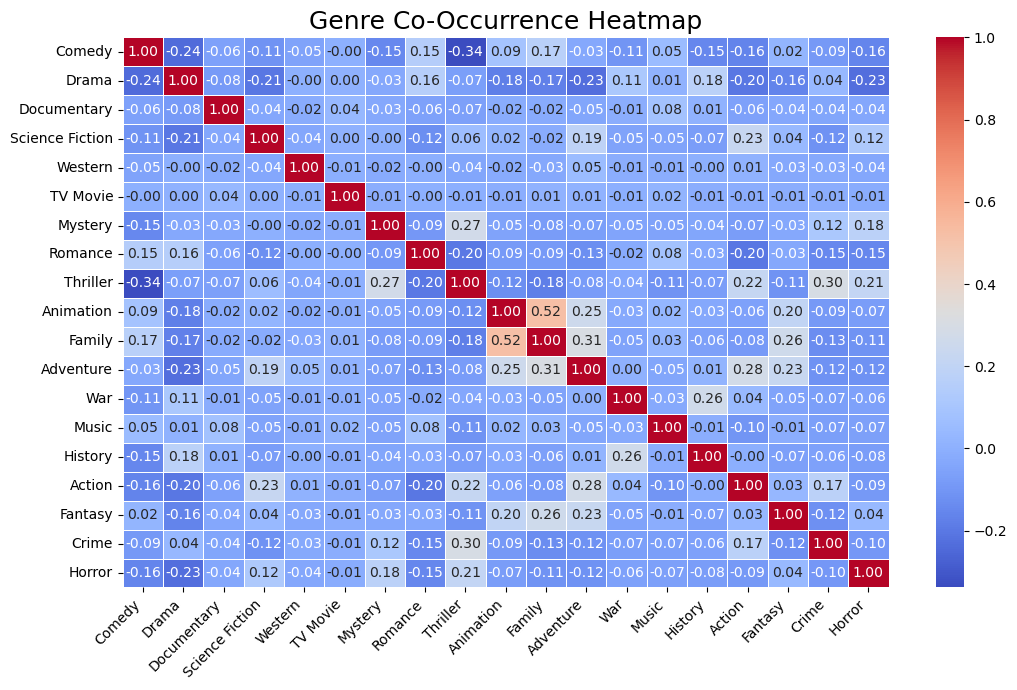

In [60]:
genre_corr = data[genre_columns].corr()

plt.figure(figsize=(11,7))
sns.heatmap(genre_corr, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot=True)
plt.title('Genre Co-Occurrence Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

___________  
## 🎬 Movie Production Status 


In [61]:
data['status'].value_counts()

status
Released    9953
Name: count, dtype: int64

In [62]:
# due to the fact that all the movies in our dataset are 'Released', this feature does not provide any useful information
data.drop(columns=['status'], inplace=True)

___________  
## 🏢 Production Companies


In [63]:
print(f"Number of different combinations: {data['production_companies'].value_counts().count()}")
print(f"\n{data['production_companies'].value_counts()}")

Number of different combinations: 8202

production_companies
Metro-Goldwyn-Mayer                                                                                           179
Paramount Pictures                                                                                            108
20th Century Fox                                                                                               95
Warner Bros. Pictures                                                                                          90
Universal Pictures                                                                                             57
                                                                                                             ... 
PolyGram Filmed Entertainment, Def Pictures, Dragon Pictures, Interscope Communications, Gramercy Pictures      1
Island Pictures, Enchanter Entertainment                                                                        1
Egmont Film, Screen Gems, S

### Since there are so many different combinations of companies, we will create a feature listing the number of companies involved in the production and if at least one of the top 10 production companies is included.
#### - Top 10 companies will be a manually constructed list after a bit of research online

In [64]:
top_10_companies = [
    'Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Walt Disney', 
    'Columbia Pictures', '20th Century Fox', 'New Line Cinema', 'Marvel', 
    'Pixar', 'Lionsgate'
]

#להכניס שם של חברה ובכל השאר אחר 

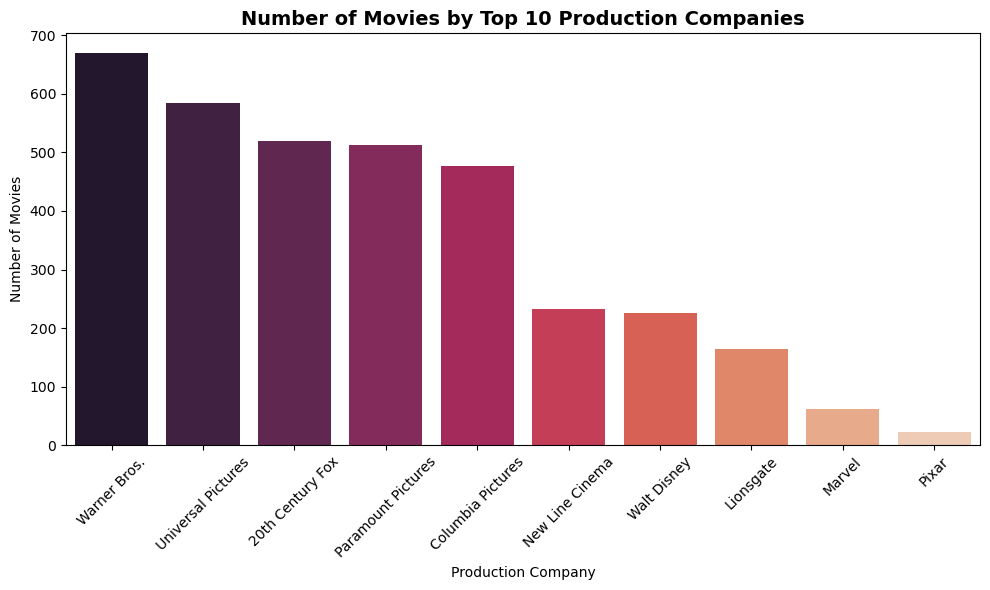

In [65]:
company_counts = {
    company: data['production_companies'].str.contains(company, case=False, na=False).sum()
    for company in top_10_companies
}

sorted_counts = dict(sorted(company_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_counts.keys()), y=list(sorted_counts.values()), palette='rocket')
plt.title('Number of Movies by Top 10 Production Companies', fontsize=14, fontweight='bold')
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
def find_top_company(x, top_companies):
    if not isinstance(x, str):
        return None
    
    for company in top_companies:
        if company.lower() in x.lower():
            return company
    return None

data['top10_prod_comps'] = data['production_companies'].apply(
    lambda x: find_top_company(x, top_10_companies)
)
data['top10_prod_comps'].fillna('Other', inplace=True)
data['num_production_companies'] = data['production_companies'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

In [67]:
data['top10_prod_comps'].value_counts()

top10_prod_comps
Other                 6609
Warner Bros.           669
Universal Pictures     580
20th Century Fox       510
Paramount Pictures     503
Columbia Pictures      462
Walt Disney            224
New Line Cinema        201
Lionsgate              157
Marvel                  31
Pixar                    7
Name: count, dtype: int64

In [68]:
print(f"Each movie is associated with between {data['num_production_companies'].min()} and {data['num_production_companies'].max()} production companies, with an average of {data['num_production_companies'].mean():.2f} companies per movie.")

Each movie is associated with between 0 and 24 production companies, with an average of 3.09 companies per movie.


##### 🎯 Reminder:
We previously investigated movies with 0 production companies and found that in most cases,
these are valid entries — such as independent, student, or self-produced films.
Therefore, we decided this is not missing data and chose to keep these records as-is.


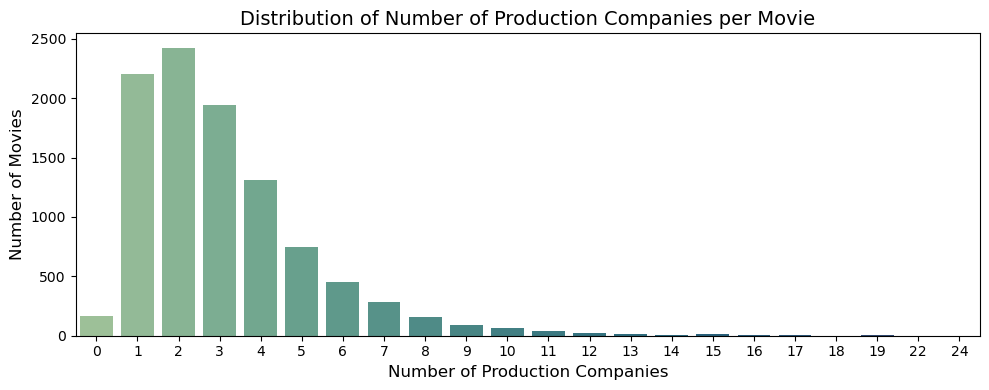

In [69]:
company_dist = data['num_production_companies'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
sns.barplot(x=company_dist.index, y=company_dist.values, palette='crest')

plt.title('Distribution of Number of Production Companies per Movie', fontsize=14)
plt.xlabel('Number of Production Companies', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [70]:
many_companies = data[data['num_production_companies'] >= 15]
print(f"Number of movies with 15 or more production companies: {len(many_companies)}")
print(many_companies[['title', 'num_production_companies']].head(10))

Number of movies with 15 or more production companies: 27
                            title  num_production_companies
11             Dancer in the Dark                        15
431                      Dogville                        24
1314                    Manderlay                        15
1339              Live and Become                        17
2586            Valley of Flowers                        15
3334           A Sound of Thunder                        17
4340                    Red Cliff                        15
5205                     Sunshine                        15
5916  The Flight Before Christmas                        15
6812                 The Round Up                        15


In [71]:
print(data.loc[3334, 'production_companies'])

Franchise Pictures, Crusader Entertainment, ApolloMedia, Baldwin Entertainment Group, Coco, Dante Entertainment, ETIC Films, Epsilon Motion Pictures, Film 111, Forge, Jericho Productions Ltd., MFF (Sound of Thunder), Matrix Film Finance, QI Quality International GmbH Co. KG, Scenario Lane Productions, Warner Bros. Pictures, Mobius International


#### 🏢 Production Companies – Many Companies

We found 27 movies with 15 or more production companies.  
Manual review confirmed that these cases are valid and reflect **complex international co-productions**,  
not data errors.

📌 Example: *A Sound of Thunder* is associated with 17 companies, including major and financing studios.

✅ Therefore, we consider these records as accurate and kept them unchanged in our dataset.


In [72]:
data.drop(columns=['production_companies'], inplace=True)

___________  
## 🌍 Production Countries Overview

In [73]:
from collections import Counter

all_countries = data['production_countries'].dropna().str.split(', ')
flat_list = [country for sublist in all_countries for country in sublist]
country_counts = Counter(flat_list)

In [74]:
import plotly.express as px

country_df = pd.DataFrame(country_counts.items(), columns=['country', 'count'])

fig = px.choropleth(country_df,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    color_continuous_scale='Blues',
                    title='Production Frequency by Country')


fig = px.choropleth(
    country_df,
    locations='country',
    locationmode='country names',
    color='count',
    color_continuous_scale='Blues',
    title='Production Frequency by Country'
)

fig.update_layout(
    width=1000,
    height=600,
    title_x=0.5,
    coloraxis_colorbar=dict(
        title='Number of Movies',
        thickness=15,
        len=0.75,
        x=1
    )
)

fig.update_geos(
    projection_type="natural earth",
    showcountries=True,
    showcoastlines=True,
    showland=True,
    landcolor="LightGray"
)

fig.show()


In [75]:
# number of different production countries combinations
print(f"Number of total combinations: {data['production_countries'].value_counts().count()}\n")

Number of total combinations: 969



#### Since the production counrtries are sorted by contribution, we have decided to take only the main production country, as well as the number of countires contibuted.

In [76]:
data['main_production_country'] = data['production_countries'].apply(lambda x: x.split(',')[0] if isinstance(x, str) and x else None)
data['num_production_countries'] = data['production_countries'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

In [77]:
print(f"The number of production countries per movie ranges from {data['num_production_countries'].min()} to {data['num_production_countries'].max()}, with a median of {data['num_production_countries'].median()}.")

The number of production countries per movie ranges from 1 to 16, with a median of 1.0.


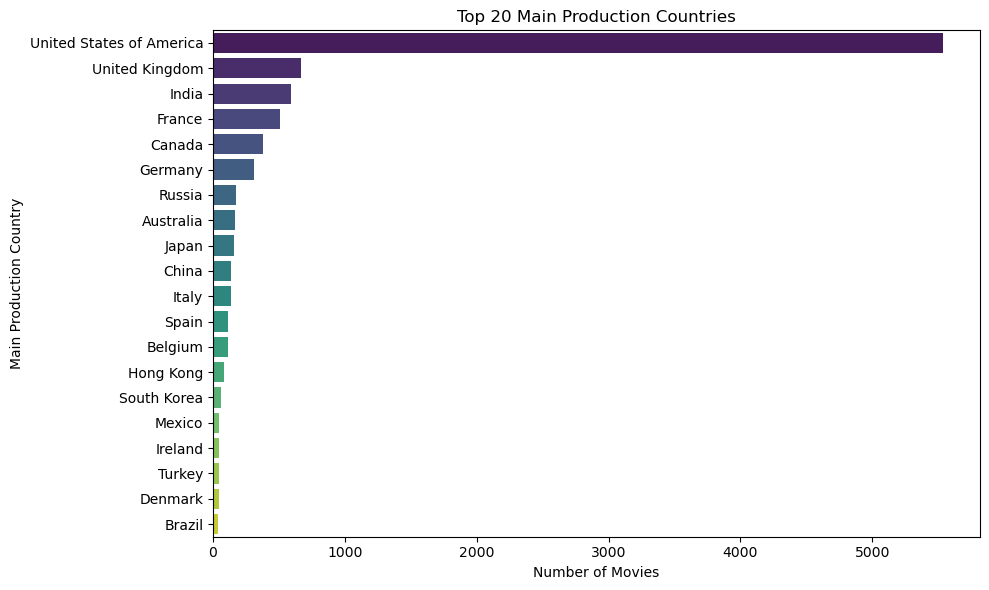

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data,y='main_production_country',order=data['main_production_country'].value_counts().head(20).index,palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Main Production Country')
plt.title('Top 20 Main Production Countries')
plt.tight_layout()
plt.show()

In [79]:
data.drop(columns=['production_countries'], inplace=True)

___________  
## 🗣️ Languages
### Spoken Language:

In [80]:
print(f"Number of total combinations: {data['spoken_languages'].value_counts().count()}\n")
print(data['spoken_languages'].value_counts())

Number of total combinations: 1063

spoken_languages
English                                                                5634
English, Spanish                                                        278
Hindi                                                                   217
English, French                                                         179
French                                                                  161
                                                                       ... 
English, French, German, Polish, Russian, Serbo-Croatian, Ukrainian       1
Mandarin, English, Polish, Vietnamese                                     1
English, Inuktitut, Spanish                                               1
English, French, Dutch, Samoan                                            1
Spanish, Hungarian, English                                               1
Name: count, Length: 1063, dtype: int64


##### Spoken Language – Design Decision

Due to the fact that most movies are in English, or include English as one of the spoken languages,  
we decided to create:
- A boolean feature indicating whether English is spoken in the movie
- A numerical feature for the total number of spoken languages

Additionally, our earlier country analysis showed that the majority of movies were produced in English-speaking countries, further supporting this decision.


In [81]:
data['num_spoken_languages'] = data['spoken_languages'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

In [82]:
data['num_spoken_languages'].min()

1

In [83]:
data['num_spoken_languages'].max()

11

In [84]:
def simplify_lang_count(n):
    if n == 1:
        return '1'
    elif n == 2:
        return '2'
    elif n == 3:
        return '3'
    else:
        return '4+'

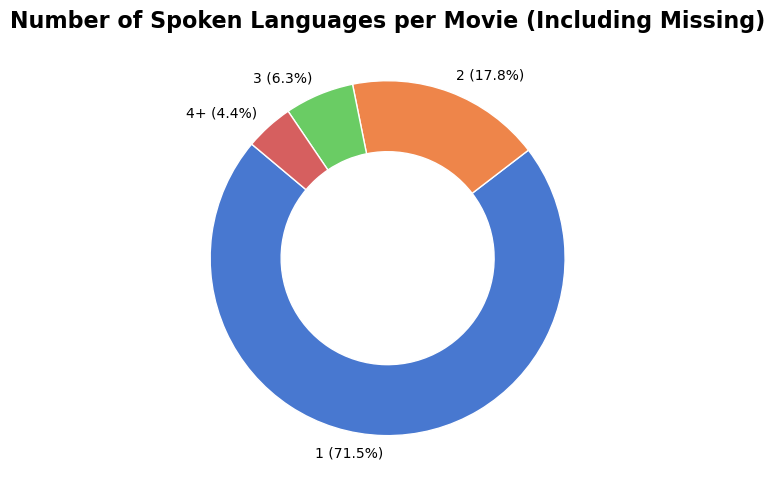

In [85]:
data['lang_group'] = data['num_spoken_languages'].apply(simplify_lang_count)

lang_group_counts = data['lang_group'].value_counts().sort_index()

labels = [f"{label} ({pct:.1f}%)" for label, pct in zip(lang_group_counts.index,
                                                        100 * lang_group_counts / lang_group_counts.sum())]

plt.figure(figsize=(5, 5))
plt.pie(
    lang_group_counts,
    labels=labels,
    startangle=140,
    colors=sns.color_palette('muted'),
    wedgeprops={'width': 0.4, 'edgecolor': 'white'}
)
plt.title('Number of Spoken Languages per Movie (Including Missing)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [86]:
data['is_english_spoken'] = data['spoken_languages'].apply(lambda x: 'English' in x if isinstance(x, str) else False)
data.drop(columns=['spoken_languages'], inplace=True)

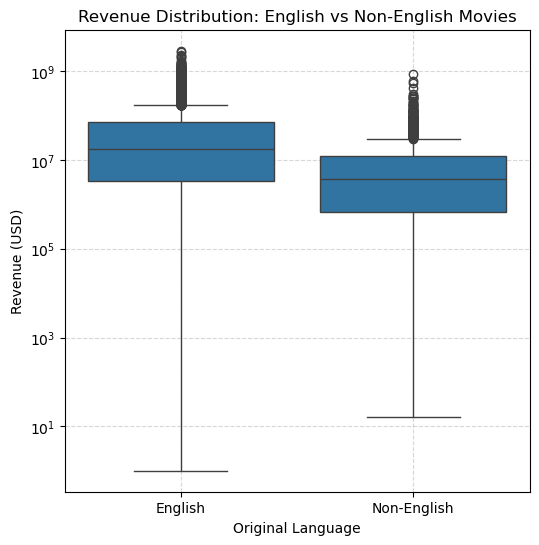

In [87]:
plt.figure(figsize=(6, 6))
sns.boxplot(
    x=data['is_english_spoken'].map({True: 'English', False: 'Non-English'}),
    y=data['revenue'],
    data=data
)
plt.yscale('log')
plt.title('Revenue Distribution: English vs Non-English Movies')
plt.xlabel('Original Language')
plt.ylabel('Revenue (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Original Language:

In [88]:
print(f"Number of different languages: {data['original_language'].value_counts().count()}\n")
print(data['original_language'].value_counts())

Number of different languages: 60

original_language
en    7827
fr     304
hi     304
ru     189
es     161
ja     119
it     113
ta      98
zh      88
ml      77
de      66
ko      62
cn      50
te      49
tr      42
pt      35
sv      33
fa      31
no      21
nl      21
da      20
ur      19
ar      19
th      19
tl      15
fi      14
bn      14
pl      13
he      12
kn      11
id      11
ms      10
pa      10
vi       9
hu       9
ro       8
uk       7
el       5
cs       4
mr       4
et       3
sr       3
gl       2
si       2
ca       2
ku       2
lv       2
xx       2
hr       1
sk       1
dv       1
sq       1
km       1
tn       1
bm       1
bs       1
lt       1
iu       1
ps       1
mn       1
Name: count, dtype: int64


#### Due to the vast majority of movies original language being English again, we beleive it is not so necesary to keep this feature as well as the previous one.

In [89]:
data.drop(columns=['original_language'], inplace=True)

___________  
## 🌟 Popularity Trends and Insights

In [90]:
# We want to try to understand the true meaning of the popularity value, so we will check how it distibutes to get a better understanding:
print("Popularity Statistics:")
print(f"Minimum Popularity: {data['popularity'].min():.2f}")
print(f"Median Popularity: {data['popularity'].median():.2f}")
print(f"Maximum Popularity: {data['popularity'].max():.2f}")

Popularity Statistics:
Minimum Popularity: 0.01
Median Popularity: 2.96
Maximum Popularity: 390.45


In [91]:
print(data.loc[data['popularity'].idxmax(), ['title', 'popularity', 'release_date']])

title             In the Lost Lands
popularity                   390.45
release_date    2025-02-27 00:00:00
Name: 9927, dtype: object


The movie with the highest popularity score, *In the Lost Lands* (2025), highlights how popularity reflects real-time public interest around a film’s release, rather than long-term success.

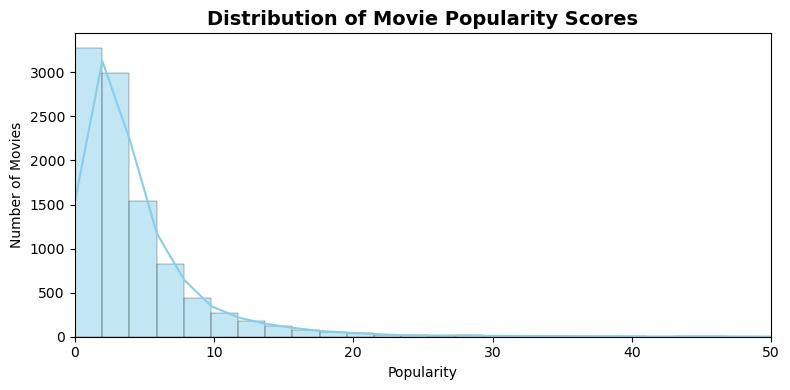

In [92]:
plt.figure(figsize=(8, 4))
sns.histplot(data['popularity'], bins=200, kde=True, color='skyblue')
plt.title('Distribution of Movie Popularity Scores', fontsize=14, fontweight='bold')
plt.xlabel('Popularity')
plt.ylabel('Number of Movies')

plt.xlim(0, 50) 
plt.tight_layout()
plt.show()


#### **Popularity Next Steps**
The distribution of movie popularity is highly skewed, with most movies having very low scores and a few outliers reaching extremely high values.  
There is no clear or bounded scale (e.g., 0–10), and the metric likely reflects TMDb's internal engagement formula (views, votes, clicks, etc.).

In [93]:
bins = [0, 1, 2, 5, 10, 20, 50, 100, data['popularity'].max()]

labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-50', '50-100', '100+']

data['popularity_group'] = pd.cut(data['popularity'], bins=bins, labels=labels, include_lowest=True)

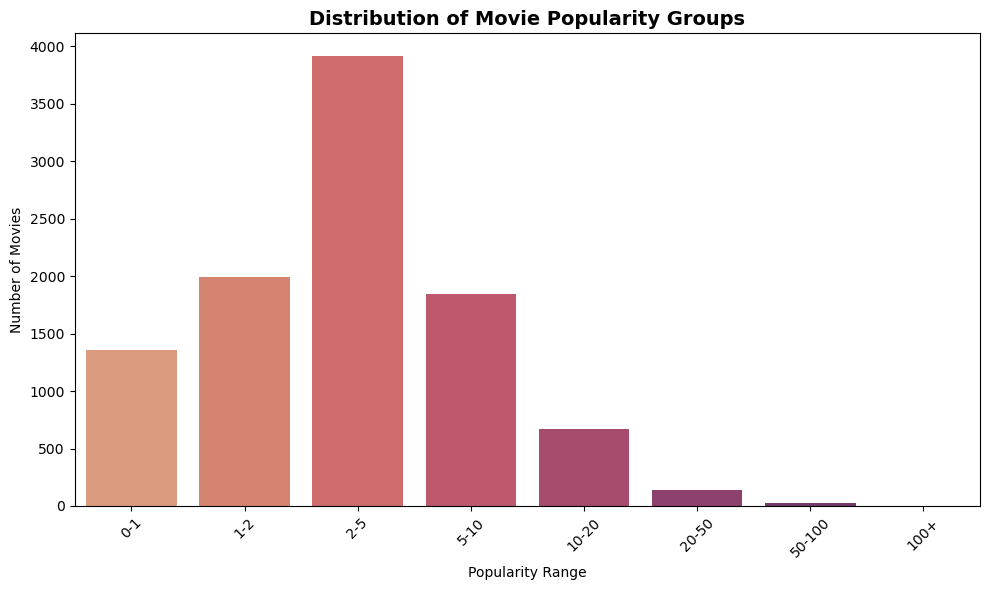

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(x='popularity_group', data=data, palette='flare')
plt.title("Distribution of Movie Popularity Groups", fontsize=14, fontweight='bold')
plt.xlabel("Popularity Range")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

data.drop(columns=['popularity_group'], inplace=True)

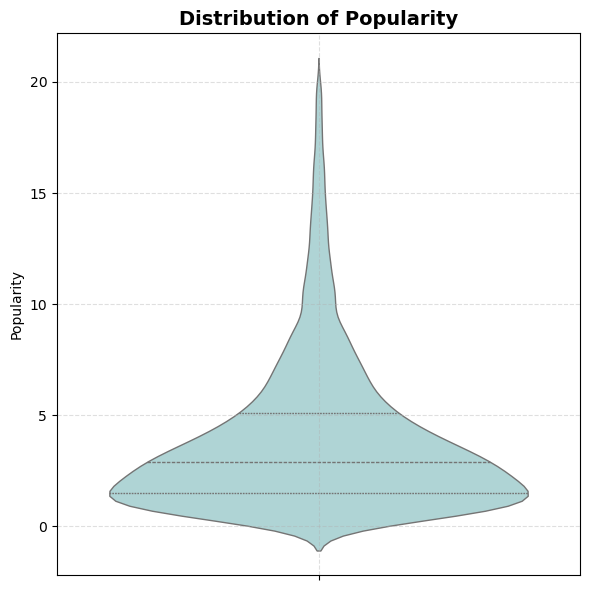

In [95]:
filtered_pop = data[data['popularity'] <= 20]

plt.figure(figsize=(6, 6))
sns.violinplot(
    y=filtered_pop['popularity'],
    inner='quartile',
    linewidth=1,
    color='#A8DADC'
)
plt.title('Distribution of Popularity', fontsize=14, weight='bold')
plt.ylabel('Popularity')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

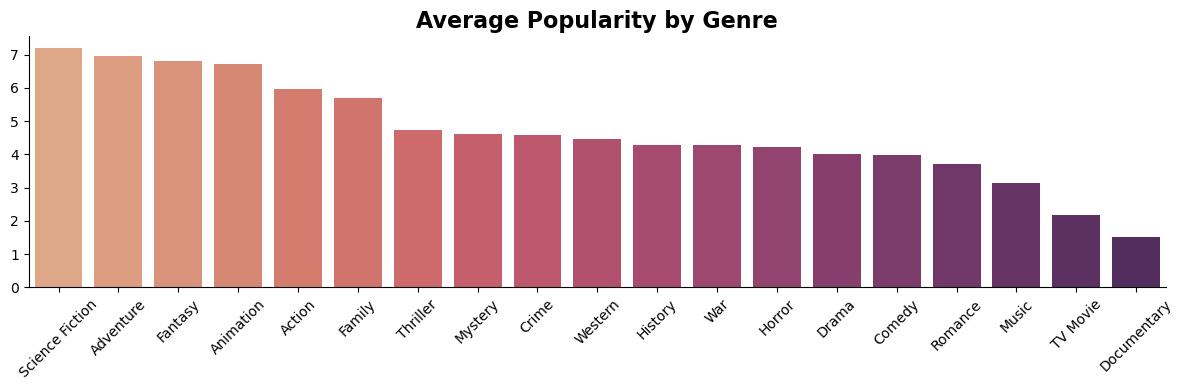

In [96]:
# testing how the popularity score is distributed between different genres
# We will sort the genres in descending order of their average popularity
genre_popularity = {
    genre: data.loc[data[genre], 'popularity'].mean()
    for genre in genre_columns
}
genre_popularity = dict(sorted(genre_popularity.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(12, 4))
plt.grid(False)

colors = sns.color_palette("flare", len(genre_popularity))
ax = sns.barplot(x=list(genre_popularity.keys()), y=list(genre_popularity.values()), palette=colors)

plt.title("Average Popularity by Genre", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

In [97]:
# We will create a percentile rank for the popularity score
# This will help us understand how a movie's popularity compares to others
data['popularity_percentile'] = data['popularity'].rank(pct=True) * 100
data['popularity_percentile']

2       79.50
3       52.87
6       99.69
7       98.03
8       99.04
         ... 
11247   89.33
11249   74.89
11250    3.73
11253    3.90
11254   42.40
Name: popularity_percentile, Length: 9953, dtype: float64

##### **Popularity – Understanding the Feature**

After reviewing IMDb's website, we confirmed that they do not use "popularity" as a ranking metric.  
Instead, popularity reflects how much attention a movie is getting — based on views, searches, trends, marketing, timing, and general hype.

This means popularity tells us how well a movie is performing **right now**,  
which also explains why the vast majority of movies have relatively low popularity scores.


___________  
## ⭐ Audience Ratings and Vote Contributions
### Now we will test how overall rankings work:


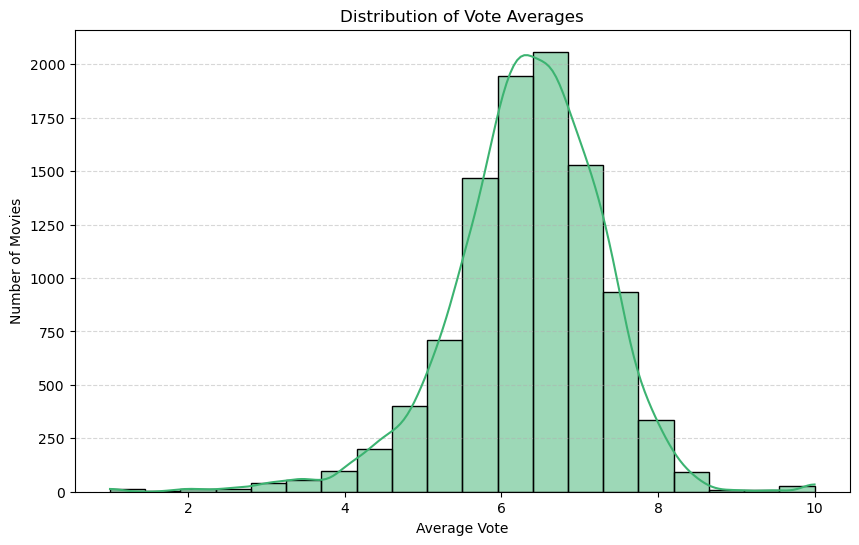

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(data['vote_average'], bins=20, color='mediumseagreen', kde=True)
plt.title('Distribution of Vote Averages')
plt.xlabel('Average Vote')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

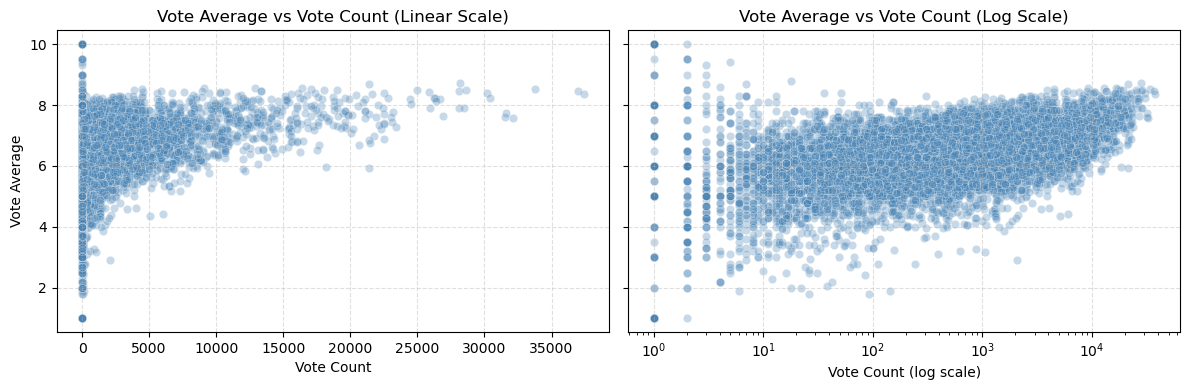

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Plot 1: Linear scale
sns.scatterplot(x='vote_count', y='vote_average', data=data, alpha=0.3, color='steelblue', ax=axes[0])
axes[0].set_title('Vote Average vs Vote Count (Linear Scale)')
axes[0].set_xlabel('Vote Count')
axes[0].set_ylabel('Vote Average')
axes[0].grid(True, linestyle='--', alpha=0.4)

# Plot 2: Log-scaled x-axis
sns.scatterplot(x='vote_count', y='vote_average', data=data, alpha=0.3, color='steelblue', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Vote Average vs Vote Count (Log Scale)')
axes[1].set_xlabel('Vote Count (log scale)')
axes[1].set_ylabel('') 
axes[1].grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

### Relationship Between Vote Count and Vote Average

The scatterplots show the relationship between the number of votes (`vote_count`) and the average rating (`vote_average`), using both linear (left) and logarithmic (right) scales.

#### Key Observations:
- Most movies received very few votes — clustered at the lower-left corner.
- Movies with low vote counts exhibit a wide spread of ratings — extreme scores are more common.
- As vote count increases, ratings tend to stabilize between **6–8**, suggesting that more votes lead to more reliable averages.
- The log scale helps visualize the dense concentration of low-vote movies more clearly.

#### Conclusion:
Movies with very few votes are less reliable in terms of rating.  
Therefore, it's recommended to consider `vote_count` when analyzing `vote_average`.

<br><br>


### ⭐ IMDb's Weighted Rating Formula

After doing a bit of research, we found that IMDb uses a technique to rate their movies using a formula.

This formula calculates a **weighted rating** designed to prevent scores from being skewed by movies with very few votes.

> 📌 *For example, a movie rated 10 by just 2 users would have an average of 10 — but that doesn’t necessarily mean it’s truly excellent.*

IMDb attempts to factor in the number of votes as part of the overall evaluation.

#### Formula Components:
- **R** = Average rating for the movie  
- **v** = Number of votes for the movie  
- **m** = Minimum votes required to be considered for ranking  
  *(we will use a quantile to determine this)*  
- **C** = Mean rating across all movies


In [100]:
# We will use the 25th percentile of the vote count as a threshold to filter out movies with very few votes
# This will help us focus on movies that have a more reliable average rating

m = data['vote_count'].quantile(0.0) #גל תבדוק!
C = data['vote_average'].mean()
v = data['vote_count']
R = data['vote_average']

data['weighted_rating'] = ((v / (v + m)) * R) + ((m / (v + m)) * C)

In [101]:
print("Weighted Ratings Statistics:")
print(f"Min: {data['weighted_rating'].min():.2f}")
print(f"Max: {data['weighted_rating'].max():.2f}")
print(f"Mean: {data['weighted_rating'].mean():.2f}")
print(f"Median: {data['weighted_rating'].median():.2f}")


Weighted Ratings Statistics:
Min: 1.85
Max: 8.89
Mean: 6.34
Median: 6.40


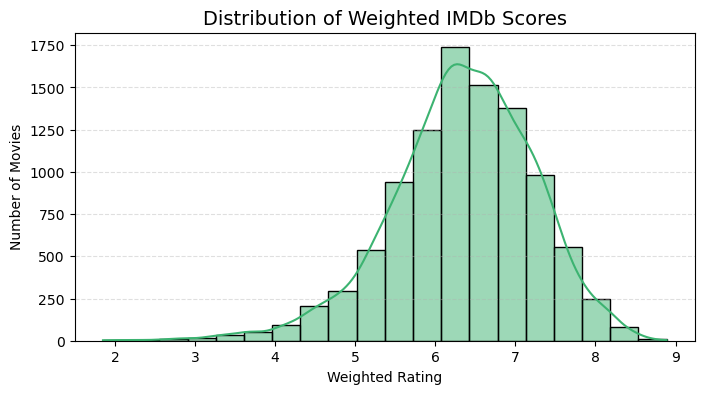

In [102]:
plt.figure(figsize=(8, 4))
sns.histplot(data['weighted_rating'], bins=20, kde=True, color='mediumseagreen')
plt.title('Distribution of Weighted IMDb Scores', fontsize=14)
plt.xlabel('Weighted Rating')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

### The weighted rating will give us a more even way of ranking the movies and will be easier to implement in later stages.

___________  
## 📦 Belongs to Collection Analysis  


In [103]:
data['belongs_to_collection'] = data['belongs_to_collection'].notnull().astype(int)
# 1 = the movie belongs to a collection (series)
# 0 = the movie does not belong to any collection

collection_counts = data['belongs_to_collection'].value_counts()

print(f"Belongs to a collection: {collection_counts.get(1, 0)}")
print(f"Does NOT belong to a collection: {collection_counts.get(0, 0)}")

Belongs to a collection: 2194
Does NOT belong to a collection: 7759


___________  
## ⏱️ Runtime Analysis


In [104]:
print("Movie Runtime Statistics:")
print("Mean:", round(data['runtime'].mean(), 2))
print("Median:", round(data['runtime'].median(), 2))
print("Min:", data['runtime'].min())
print("Max:", data['runtime'].max())

Movie Runtime Statistics:
Mean: 108.68
Median: 105.0
Min: 3
Max: 335


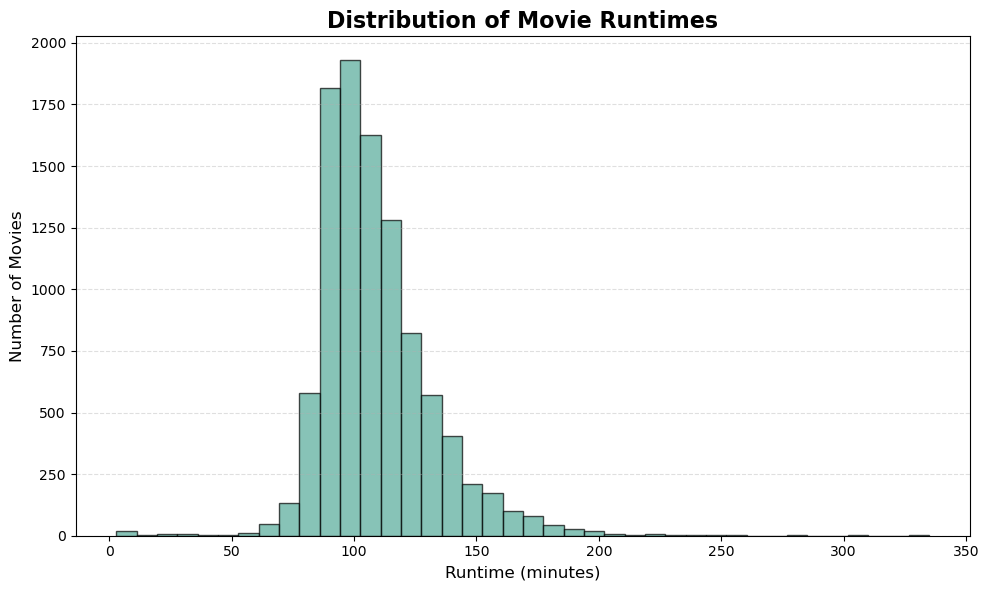

In [105]:
plt.figure(figsize=(10, 6))
color = sns.color_palette("light:#5A9_r")[0]
plt.hist(data['runtime'], bins=40, color=color, edgecolor='black', alpha=0.7)
plt.title('Distribution of Movie Runtimes', fontsize=16, fontweight='bold')
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 📍 Distribution of Movie Runtimes

Most movies are between **80–120 minutes**, matching typical theatrical lengths.

- Some very short films (as low as **3 minutes**) may be shorts or data issues.  
- A few very long movies (up to **339 minutes**) may be epics or extended editions.


In [106]:
# Filter movies with extremely long runtimes (over 210 minutes ≈ 3.5 hours)
# We'll also perform a similar check later for extremely short runtimes (under 30 minutes)

long_movies = data[data['runtime'] > 210].sort_values(by='runtime', ascending=False)
print(f"Number of movies longer than 210 minutes: {len(long_movies)}")
print(long_movies[['title', 'runtime', 'release_date']])

Number of movies longer than 210 minutes: 19
                                                title  runtime release_date
2227                            The French Revolution      335   1989-05-10
9390                               River of Fundament      310   2014-02-12
10318                                16 Days of Glory      285   1985-10-23
9262   Eric Clapton's Crossroads Guitar Festival 2010      279   2010-06-26
3630                                       Gettysburg      254   1993-10-08
2610                                        Cleopatra      251   1963-06-12
3574                                           Hamlet      242   1996-12-25
609                                Gone with the Wind      233   1939-12-15
258                       Once Upon a Time in America      229   1984-05-23
782                                Lawrence of Arabia      228   1962-12-11
2988                                        Woodstock      225   1970-03-26
5403                Lagaan: Once Upon a Tim

#### Extremely Long Movies

We identified 20 movies with runtimes longer than 210 minutes (3.5 hours).  
After checking titles like *The French Revolution* (335 min) and *River of Fundament* (310 min),  
we confirmed that these are **legitimate long films** — such as epics, operatic hybrids, or extended documentaries.

📌 Therefore, we consider these runtimes valid, and no records were removed.


In [107]:
long_movies = data[data['runtime'] < 30].sort_values(by='runtime', ascending=False)
print(f"Number of movies shorter than 30 minutes: {len(long_movies)}")
print(long_movies[['title', 'runtime', 'release_date']])

Number of movies shorter than 30 minutes: 31
                                             title  runtime release_date
9673                                The Last Petal       27   1977-07-11
11069                                    The Storm       27   1965-08-26
11244           Seven Awkward Sex Scenes. Part One       26   2018-03-15
4845                      Mickey's Christmas Carol       25   1983-10-19
10102                                 Coulrophobia       25   2015-05-31
409                                A Grand Day Out       24   1990-05-18
11034                               Lines of Glory       21   2009-12-05
8501              Barbet : L'Homme de la situation       20   2012-08-25
11153                               New Year's Eve       16   2002-11-18
8607                 The Ghost of Slumber Mountain       16   1918-11-17
11076                                       Reverb       16   2014-12-20
11039                                          Run       12   2016-10-31
10584 

### ⏱️ Extremely Short Movies

We found 33 movies with runtimes under 30 minutes.  
After manual checks, these appear to be **valid short films** — including animations, student films, or artistic shorts.

📌 Examples like *Pop* (3 min) and *180 Seconds* (4 min) confirm the accuracy of these values.  
Therefore, we chose to keep them in the dataset.

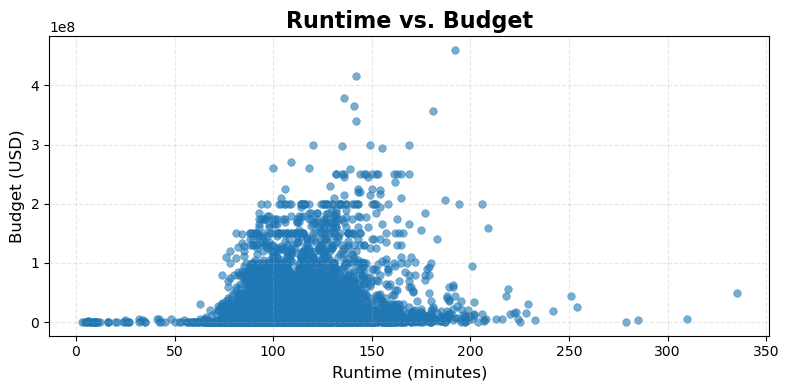

In [108]:
plt.figure(figsize=(8, 4))

sns.scatterplot(data=data,x='runtime',y='budget',alpha=0.6,edgecolor=None,
    s=30                       
)

# Titles and labels
plt.title('Runtime vs. Budget', fontsize=16, fontweight='bold')
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Budget (USD)', fontsize=12)

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


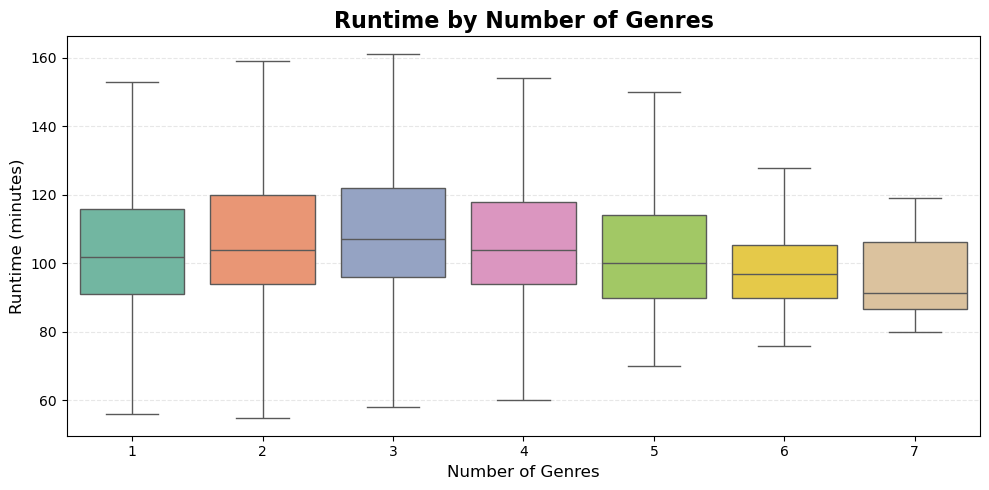

In [109]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='num_genres', y='runtime', palette='Set2', showfliers=False)
plt.title('Runtime by Number of Genres', fontsize=16, fontweight='bold')
plt.xlabel('Number of Genres', fontsize=12)
plt.ylabel('Runtime (minutes)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


___________
## 📅 Date Features and Analysis

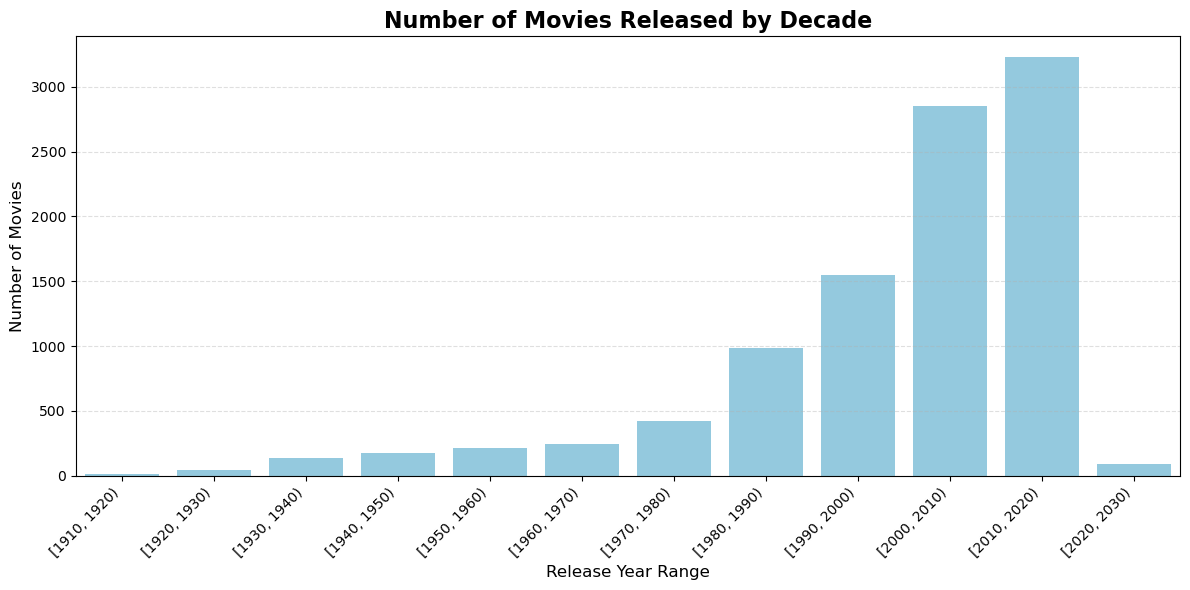

In [110]:
years = data['release_date'].dt.year

# Define bin size (example: 5 years per bin)
bin_size = 10
min_year = int(years.min() // bin_size * bin_size)
max_year = int(years.max() // bin_size * bin_size + bin_size)

# Create bins
bins = list(range(min_year, max_year + bin_size, bin_size))

# Cut years into bins
binned_years = pd.cut(years, bins=bins, right=False)

# Count movies by decade bins
binned_counts = pd.cut(data['release_date'].dt.year, bins=bins, right=False).value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=binned_counts.index.astype(str), y=binned_counts.values, color='skyblue')
plt.title('Number of Movies Released by Decade', fontsize=16, fontweight='bold')
plt.xlabel('Release Year Range', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [111]:
data['release_year'] = data['release_date'].dt.year
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
data['Season'] = data['release_date'].apply(lambda x: season_dict[x.month] if pd.notnull(x) else 'unknown').astype('category')

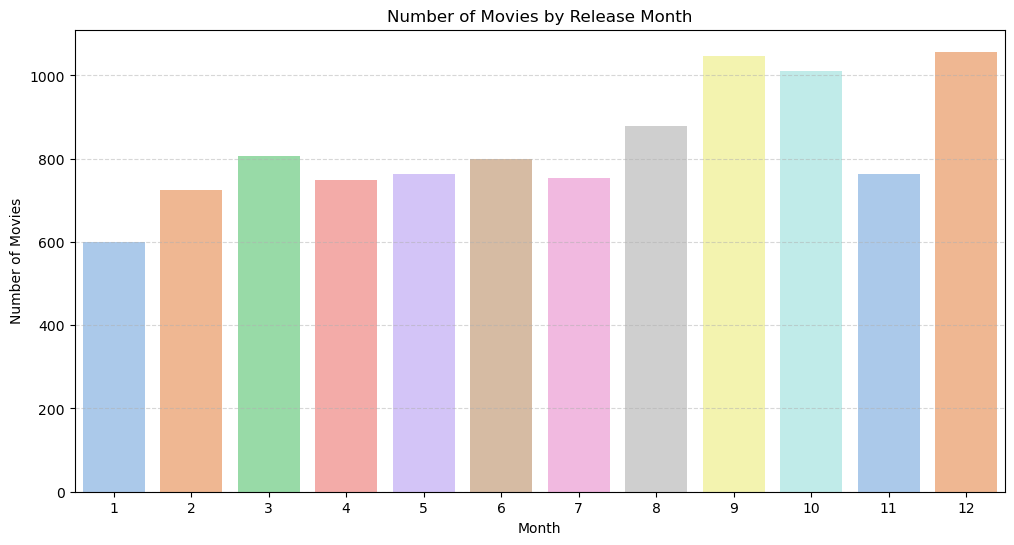

In [112]:
release_month = data['release_date'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x=release_month, palette='pastel')
plt.title('Number of Movies by Release Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

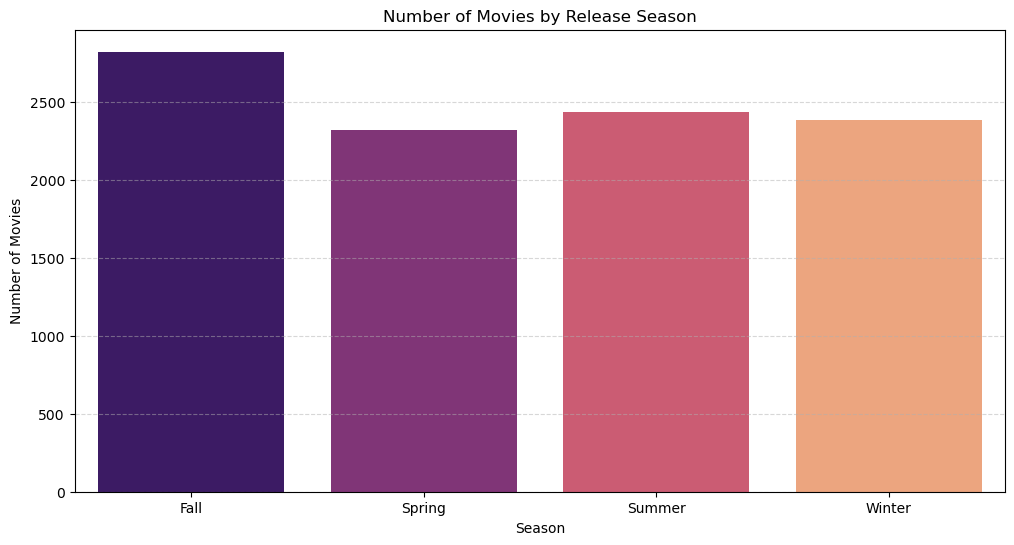

In [113]:
release_month = data['Season']

plt.figure(figsize=(12, 6))
sns.countplot(x=release_month, palette='magma')
plt.title('Number of Movies by Release Season')
plt.xlabel('Season')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

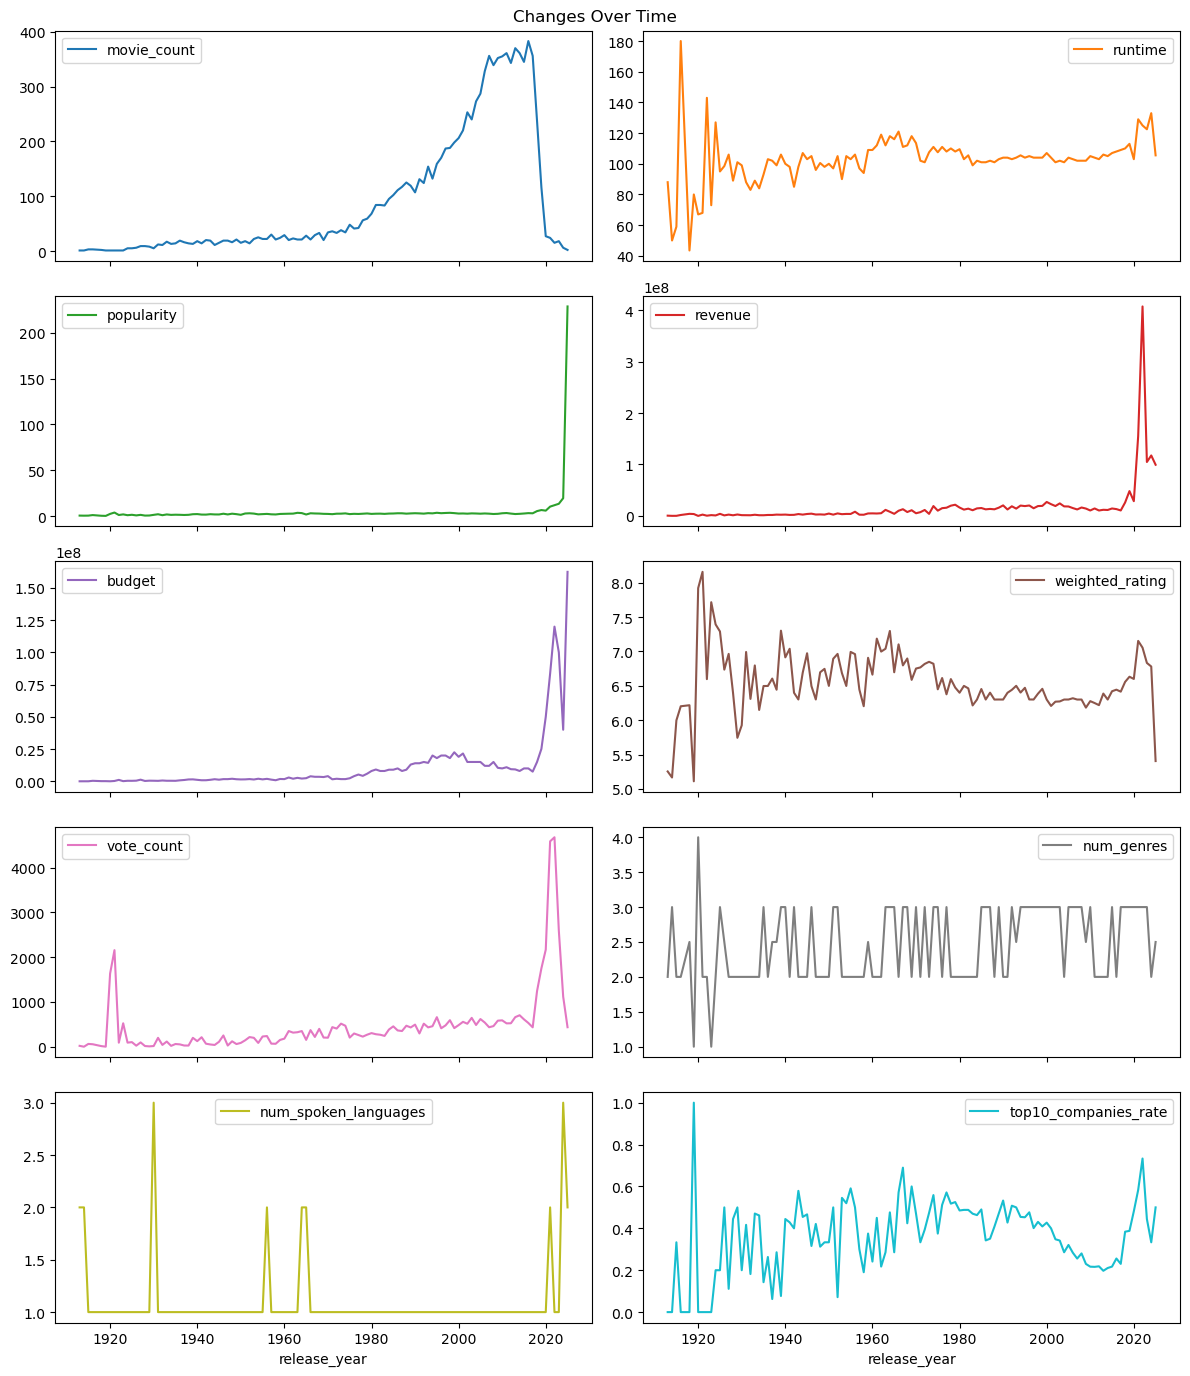

In [114]:
data['release_year'] = data['release_date'].dt.year
data_plot = data.copy()
data_plot["top10_prod_comps"] = data_plot["top10_prod_comps"].apply(lambda x: False if x.lower() == 'other' else True)
yearly_medians = data_plot.groupby('release_year').agg({
    'id': 'count',
    'runtime': 'median',
    'popularity': 'median',
    'revenue': 'median',
    'budget': 'median',
    'weighted_rating': 'median',
    'vote_count': 'median',
    'num_genres': 'median',
    'num_spoken_languages': 'median',
    'top10_prod_comps': 'mean' 
}).rename(columns={
    'id': 'movie_count',
    'top10_prod_comps': 'top10_companies_rate'
})

yearly_medians.plot(
    subplots=True,
    figsize=(12, 14),
    layout=(5, 2),
    title='Changes Over Time'
)

plt.tight_layout()
plt.show()


### Time-Based Trends in Movie Data

To evaluate which features are influenced by time, we analyzed yearly trends of several key variables.

We plotted the yearly median of:

- 🎬 **Number of Movies Released**  
- ⏱️ **Runtime**
- 📊 **Popularity**
- 💵 **Revenue**
- 💰 **Budget**
- ⭐ **weighted_rating**
- 🗳️ **Vote Count**
- 🎭 **Number of Genres**
- 🗣️ **Number of Spoken Languages**
- 🏢 **Top 10 Production Companies Rate**  

_
- Many variables (popularity, vote count, revenue, etc.) show clear temporal trends.
- Some features remained relatively stable (e.g., vote average, genres), while others sharply increased in recent decades.
- These patterns support the potential benefit of incorporating **time-aware features or temporal modeling** (like time series or year-based grouping) in downstream analyses.


____
## 💰 Budget, Revenue & Economic Performance

In [115]:
print("Movie Budget Statistics:")
print("Mean:", round(data['budget'].mean(), 2))
print("Median:", round(data['budget'].median(), 2))
print("Min:", data['budget'].min())
print("Max:", data['budget'].max())

print("\nMovie Revenue Statistics:")
print("Mean:", round(data['revenue'].mean(), 2))
print("Median:", round(data['revenue'].median(), 2))
print("Min:", data['revenue'].min())
print("Max:", data['revenue'].max())


Movie Budget Statistics:
Mean: 23255649.95
Median: 10000000.0
Min: 7
Max: 460000000

Movie Revenue Statistics:
Mean: 64943451.24
Median: 13285512.0
Min: 1
Max: 2923706026


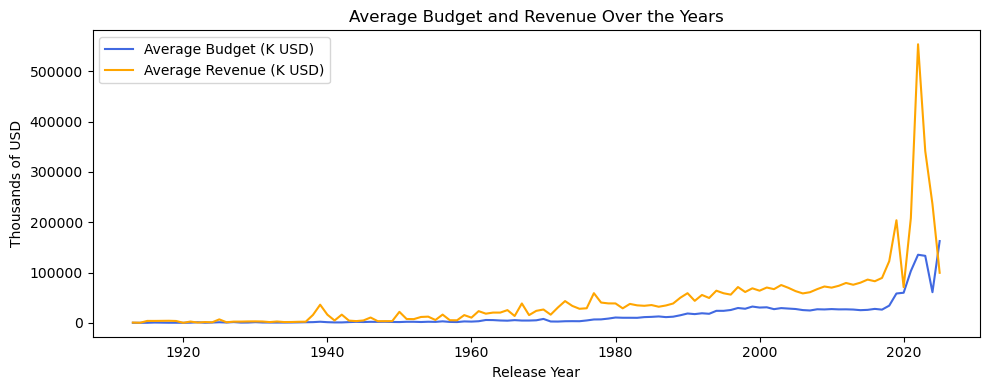

In [116]:
yearly_avg = data.groupby('release_year')[['budget', 'revenue']].mean() / 1000

plt.figure(figsize=(10, 4))
plt.plot(yearly_avg.index, yearly_avg['budget'], label='Average Budget (K USD)', color='royalblue')
plt.plot(yearly_avg.index, yearly_avg['revenue'], label='Average Revenue (K USD)', color='orange')

plt.title('Average Budget and Revenue Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Thousands of USD')
plt.legend()
plt.tight_layout()
plt.show()

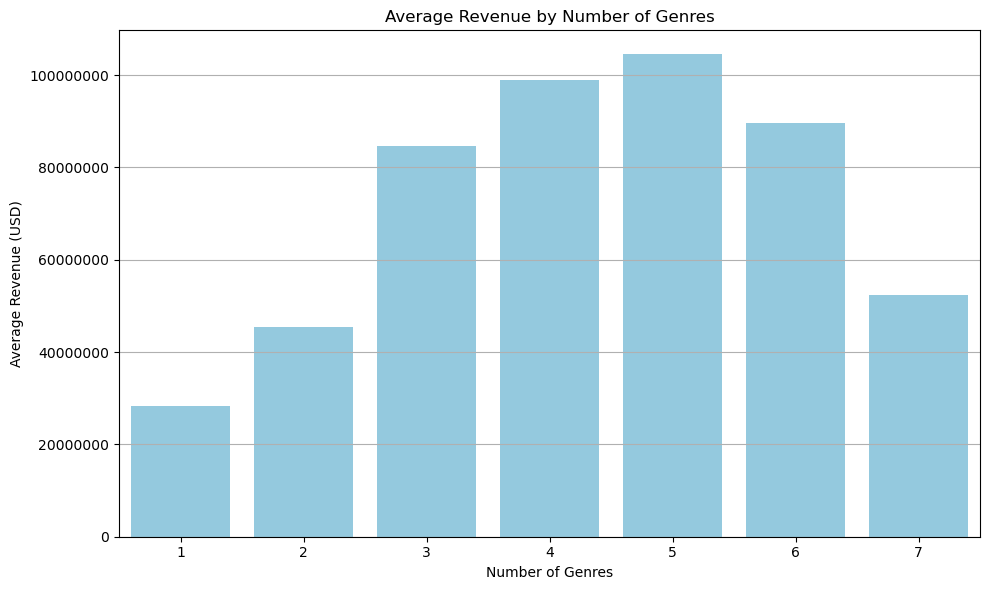

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='num_genres', y='revenue', estimator='mean', color='skyblue', ci=None)
plt.title('Average Revenue by Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Average Revenue (USD)')
plt.grid(axis='y')
plt.ticklabel_format(style='plain', axis='y') 
plt.tight_layout()
plt.show()

In [118]:
# Sort movies by budget in ascending order and show the lowest 15
lowest_budget = data.sort_values(by='budget').head(15)
print(lowest_budget[['title', 'budget', 'revenue']])


                                                   title  budget  revenue
9327                                               Sound       7       16
10584              S.W.A.G. - Episode 2: The Texas Blues      42       10
8822                                        The Big Swap      50       60
8842                                       Hugo and Rosa      50      100
10432                                            Kaptaan      60      109
9892                            Who Killed Captain Alex?      85      200
8725                                            Carmen G      93       87
9365                                          Diau Charn     100      100
10362                               Old and New Shanghai     100      100
10643                      The Puppy and the Old Slipper     100      100
10211        Head Full of Dreams, Heart Full of Promises     100       20
8717   Mrs. Brown's Boys Live Tour: Good Mourning Mrs...     120      200
10278                                 

In [119]:
high_budget = data.sort_values(by='budget', ascending = False).head(15)
print(high_budget[['title', 'budget', 'revenue']])


                                             title     budget     revenue
7973                      Avatar: The Way of Water  460000000  2320250281
8922              Star Wars: The Rise of Skywalker  416000000  1074144248
1238   Pirates of the Caribbean: On Stranger Tides  379000000  1046721266
8346                       Avengers: Age of Ultron  365000000  1405403694
9761                             Avengers: Endgame  356000000  2799439100
10401                                       Fast X  340000000   704709660
235       Pirates of the Caribbean: At World's End  300000000   961691209
8674                                Justice League  300000000   661326987
9762                        Avengers: Infinity War  300000000  2052415039
10872                           The Little Mermaid  297000000   569626289
10023        Indiana Jones and the Dial of Destiny  294700000   383963057
10871                                   Snow White  270000000   194099875
10651                                T

In [120]:
correlation = data[['budget', 'revenue']].corr()
print(correlation)

         budget  revenue
budget     1.00     0.75
revenue    0.75     1.00


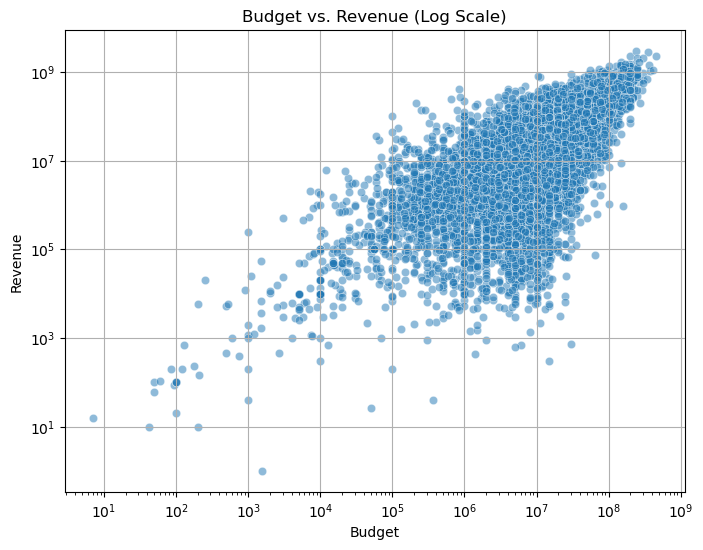

In [121]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='budget', y='revenue', alpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.title('Budget vs. Revenue (Log Scale)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [122]:
# Creating a calculated field that tells us the ratio of profit/loss to money invested:
data['return_on_investment_ratio'] = np.where(
    data['budget'] > 0,
    (data['revenue'] - data['budget']) / data['budget'],
    np.nan  # if budget is 0, set ROI to NaN
)

In [123]:
biggest_profit_per_investment = data['return_on_investment_ratio'].max()
biggest_loss_per_investment = data['return_on_investment_ratio'].min()
print(f"Biggest profit: {biggest_profit_per_investment}\nBiggest loss: {biggest_loss_per_investment}")

Biggest profit: 999.0
Biggest loss: -0.9999794


In [124]:
data[data['return_on_investment_ratio'] == biggest_profit_per_investment]

,id,title,runtime,release_date,budget,revenue,popularity,vote_average,vote_count,belongs_to_collection,...,main_production_country,num_production_countries,num_spoken_languages,lang_group,is_english_spoken,popularity_percentile,weighted_rating,release_year,Season,return_on_investment_ratio
4140,11713,Fist of Fury,108,1972-03-22,100000,100000000,4.90,7.25,978,1,...,Hong Kong,1,1,1,False,72.27,7.25,1972,Spring,999.00


### 🎬 Highest ROI Film

**Fist of Fury (1972)** had the highest return on investment (ROI) in the dataset — turning a $100K budget into $100M revenue (ROI ≈ 1000x).  
Starring **Bruce Lee**, the film became a global hit thanks to its groundbreaking martial arts action, powerful cultural themes, and Lee’s international appeal.  
It marked a major breakthrough for Hong Kong cinema on the world stage.


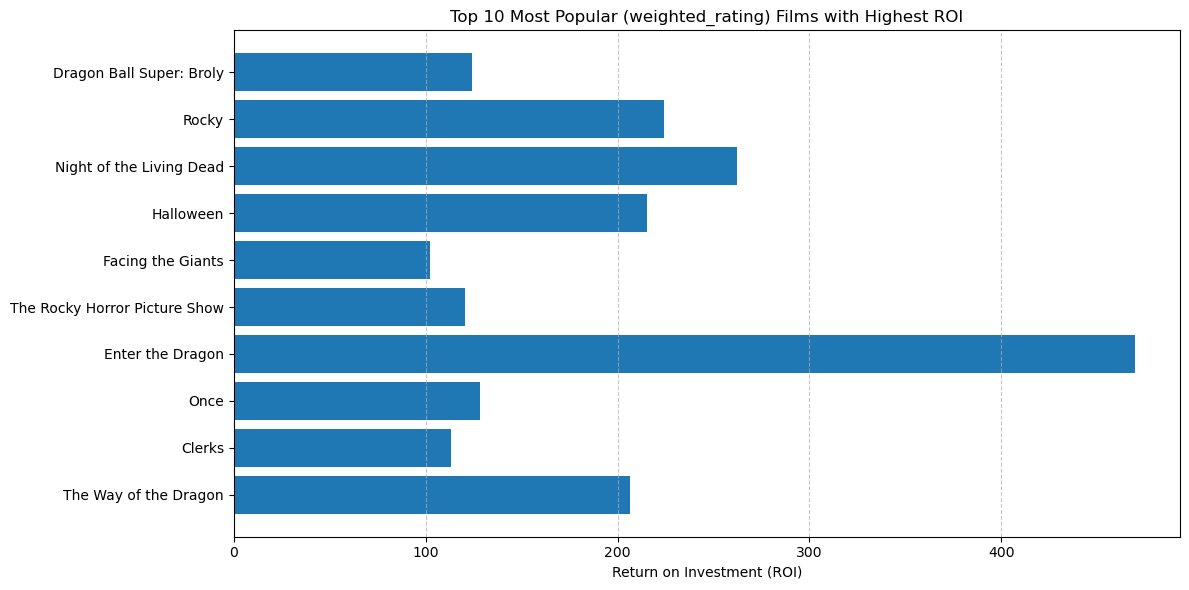

In [125]:
top_roi = data.sort_values(by='return_on_investment_ratio', ascending=False).head(50)
top_10_popular_from_roi = top_roi.sort_values(by='weighted_rating', ascending=False).head(10)

# גרף עמודות אופקי
plt.figure(figsize=(12, 6))
plt.barh(top_10_popular_from_roi['title'], top_10_popular_from_roi['return_on_investment_ratio'])
plt.xlabel('Return on Investment (ROI)')
plt.title('Top 10 Most Popular (weighted_rating) Films with Highest ROI')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


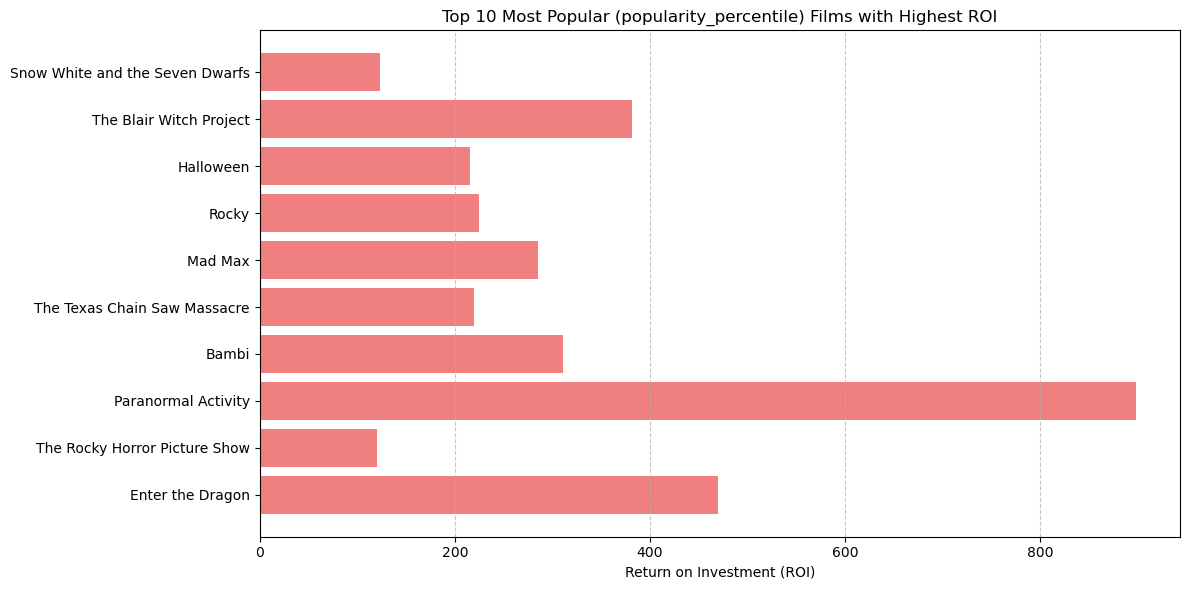

In [126]:
top_roi = data.sort_values(by='return_on_investment_ratio', ascending=False).head(50)
top_10_popular_from_roi = top_roi.sort_values(by='popularity_percentile', ascending=False).head(10)

# גרף עמודות אופקי
plt.figure(figsize=(12, 6))
plt.barh(top_10_popular_from_roi['title'], top_10_popular_from_roi['return_on_investment_ratio'], color='lightcoral')
plt.xlabel('Return on Investment (ROI)')
plt.title('Top 10 Most Popular (popularity_percentile) Films with Highest ROI')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [127]:
data[data['return_on_investment_ratio'] == biggest_loss_per_investment].head(10)


,id,title,runtime,release_date,budget,revenue,popularity,vote_average,vote_count,belongs_to_collection,...,main_production_country,num_production_countries,num_spoken_languages,lang_group,is_english_spoken,popularity_percentile,weighted_rating,release_year,Season,return_on_investment_ratio
4737,14330,Trojan War,85,1997-09-26,15000000,309,4.32,6.10,129,0,...,United States of America,1,2,2,True,67.12,6.10,1997,Fall,-1.00


### 💸 Worst ROI Film

**Trojan War (1997)** had the lowest return on investment in the dataset, earning just **$309** against a production budget of **$15 million**.

The film was released in only two theaters for one week — one of which had just two viewers, both cast members.  
This makes it one of the most extreme box office failures ever recorded.

In [128]:
# since movies that haven't made any revenue show -1 for the return on ivestment, we will need another field to show the profit/loss in dollars and not as a ratio
data['profit_loss'] = data['revenue'] - data['budget']

# show the loss for movies that haven't made any revenue
data[data['return_on_investment_ratio'] == -1]['profit_loss']

Series([], Name: profit_loss, dtype: int64)

In [129]:
print(f"Biggest loss overall: {data['profit_loss'].min()}")

Biggest loss overall: -158031147


In [130]:
print(f"Biggest loss that made no revenue: {data[data['return_on_investment_ratio'] == -1]['profit_loss'].min()}")

Biggest loss that made no revenue: nan


In [131]:
biggest_loss = data.loc[data['profit_loss'].idxmin()]
biggest_loss[['title', 'budget', 'revenue', 'return_on_investment_ratio', 'profit_loss']]

title                         The Irishman
budget                           159000000
revenue                             968853
return_on_investment_ratio           -0.99
profit_loss                     -158031147
Name: 10474, dtype: object

## Intersting to see that the movie with the biggest loss still made some revenue, whilst movies with huge budgets that did'nt make any revenue are considered 'better' in terms of overall loss.
### It is hard to beleive that a movie with such big investment made no revenue at all so we want to look a little into this:

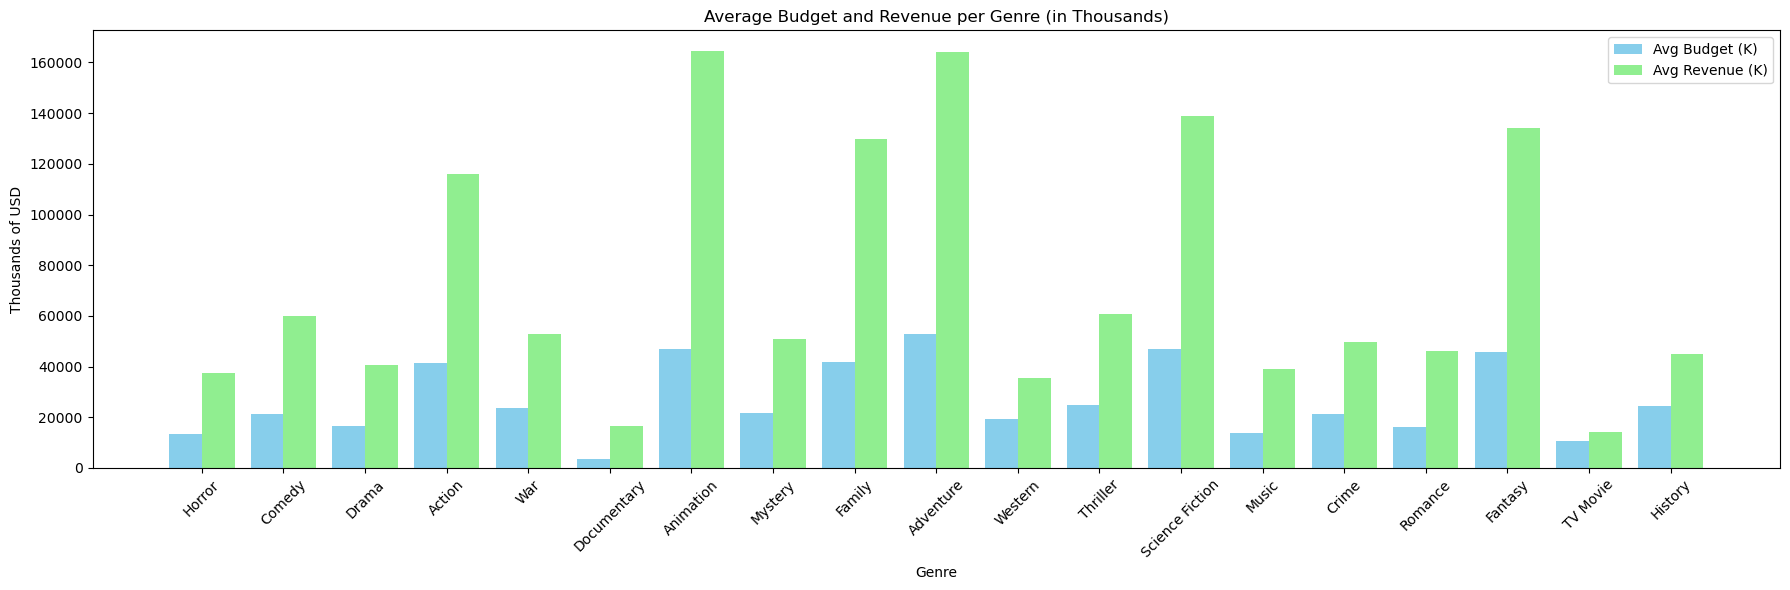

In [132]:
genres = ['Horror', 'Comedy', 'Drama', 'Action', 'War', 'Documentary', 'Animation',
          'Mystery', 'Family', 'Adventure', 'Western', 'Thriller', 'Science Fiction',
          'Music', 'Crime', 'Romance', 'Fantasy', 'TV Movie', 'History']

x = np.arange(len(genres))
width = 0.4

avg_budget = [data[data[g] == 1]['budget'].mean() / 1000 for g in genres]
avg_revenue = [data[data[g] == 1]['revenue'].mean() / 1000 for g in genres]

plt.figure(figsize=(18, 6))
plt.bar(x - width/2, avg_budget, width=width, label='Avg Budget (K)', color='skyblue')
plt.bar(x + width/2, avg_revenue, width=width, label='Avg Revenue (K)', color='lightgreen')

plt.xticks(x, genres, rotation=45)
plt.xlabel('Genre')
plt.ylabel('Thousands of USD')
plt.title('Average Budget and Revenue per Genre (in Thousands)')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

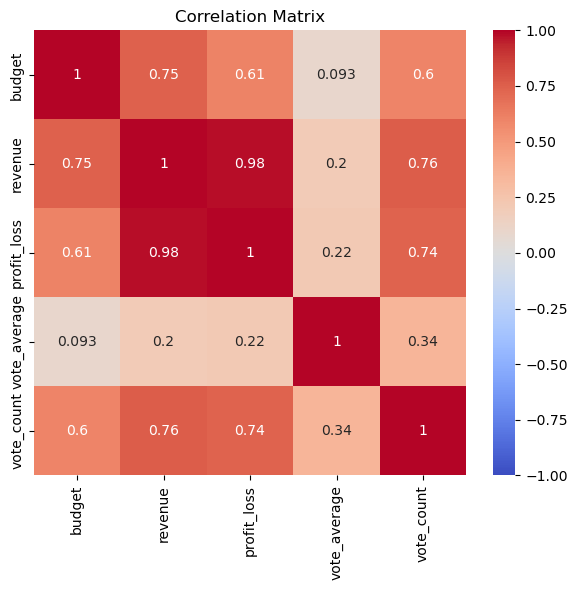

In [133]:
plt.figure(figsize=(6, 6))
sns.heatmap(data[['budget', 'revenue', 'profit_loss', 'vote_average', 'vote_count']].corr(),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

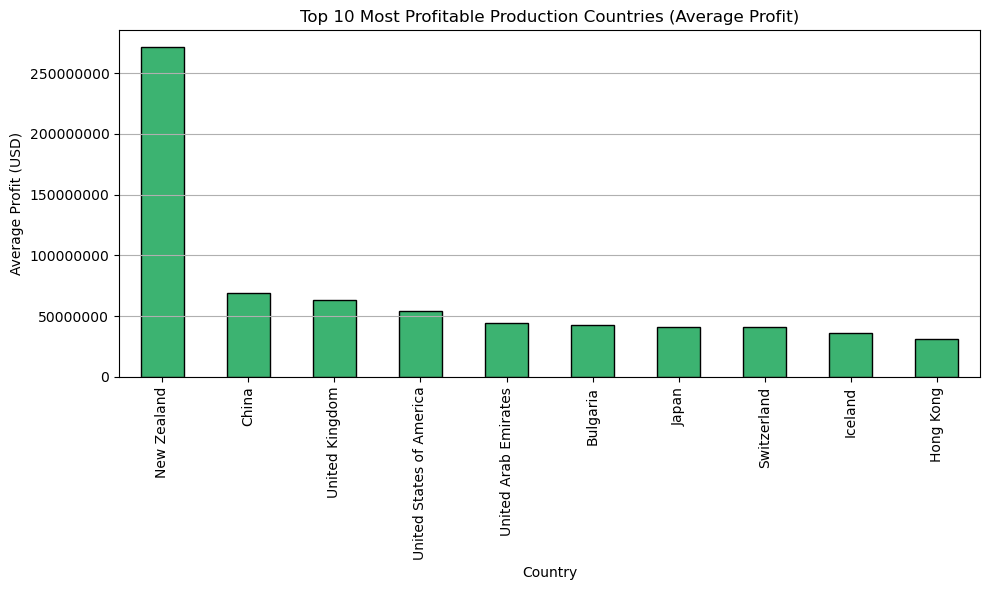

In [134]:
data.groupby('main_production_country')['profit_loss'] \
    .mean() \
    .sort_values(ascending=False) \
    .head(10) \
    .plot(kind='bar', color='mediumseagreen', figsize=(10, 6), edgecolor='black')


##פרופיט לוס? למה קוראים לזה ככה?

plt.title('Top 10 Most Profitable Production Countries (Average Profit)')
plt.ylabel('Average Profit (USD)')
plt.xlabel('Country')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


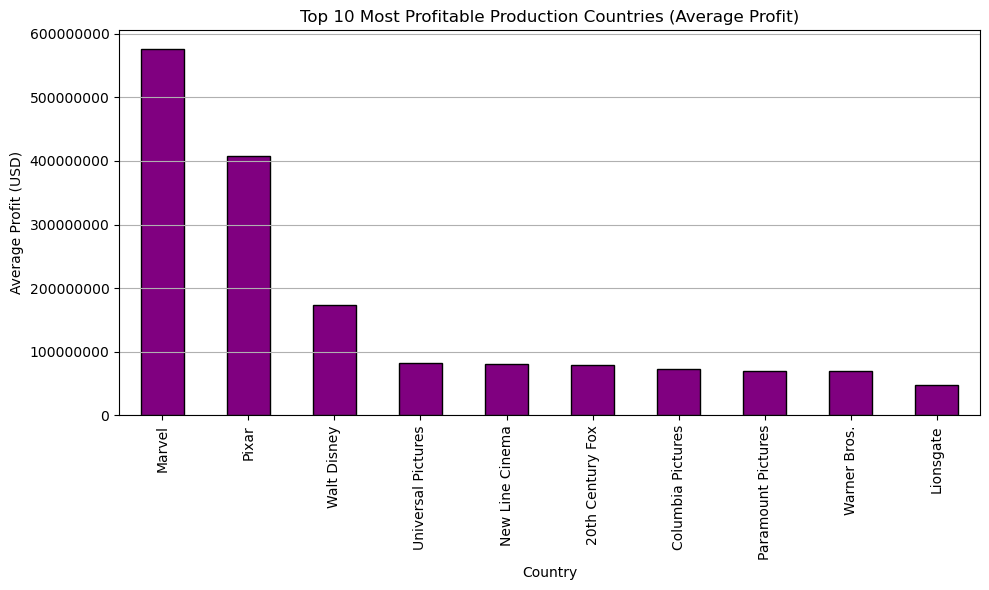

In [135]:
data.groupby('top10_prod_comps')['profit_loss'] \
    .mean() \
    .sort_values(ascending=False) \
    .head(10) \
    .plot(kind='bar', color='purple', figsize=(10, 6), edgecolor='black')


##פרופיט לוס? למה קוראים לזה ככה?

plt.title('Top 10 Most Profitable Production Countries (Average Profit)')
plt.ylabel('Average Profit (USD)')
plt.xlabel('Country')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [136]:
loss_df = data[data['profit_loss'] < 0]

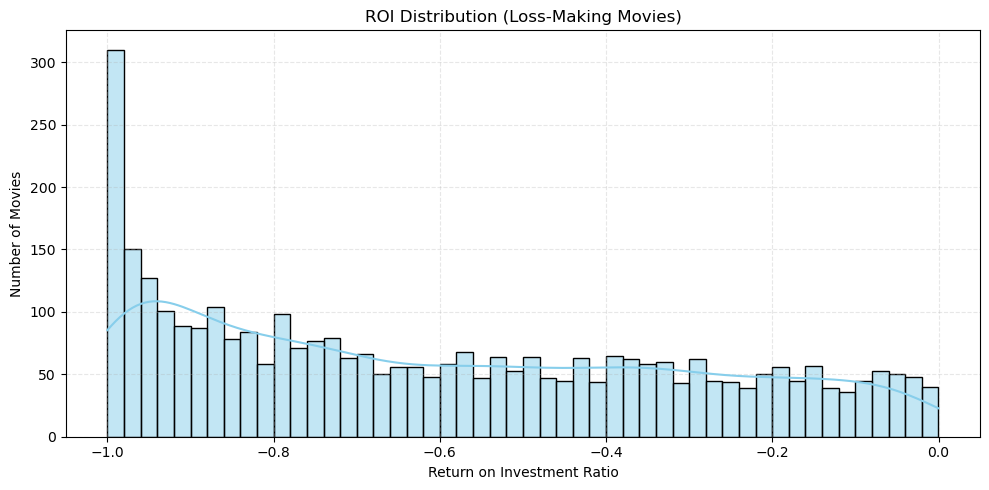

In [137]:
plt.figure(figsize=(10, 5))
sns.histplot(loss_df['return_on_investment_ratio'], bins=50, kde=True, color='skyblue')
plt.title('ROI Distribution (Loss-Making Movies)')
plt.xlabel('Return on Investment Ratio')
plt.ylabel('Number of Movies')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

___________
## 🔍 More Exploration & Insights


In [138]:
hidden_gems = data[((data['vote_average'] > 8.2) & (data['vote_count'] < 100) & (data['vote_count'] > 10))]
hidden_gems['title']

5286     Madonna: The Confessions Tour
6274          Iron Maiden: Rock In Rio
9573                       Punjab 1984
10883                Expendable Assets
Name: title, dtype: object

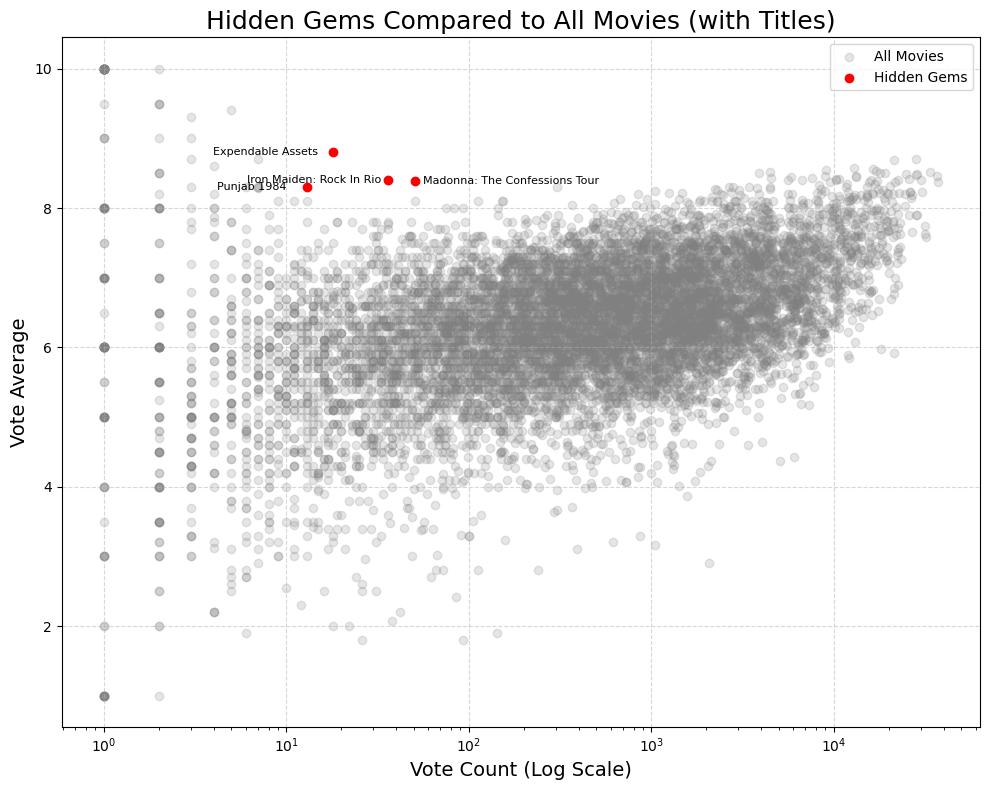

In [139]:
plt.figure(figsize=(10, 8))

titles_left = {'Iron Maiden: Rock In Rio', 'Punjab 1984', 'Expendable Assets'}

# Plot all movies in gray
plt.scatter(data['vote_count'], data['vote_average'], alpha=0.2, label='All Movies', color='grey')

# Plot hidden gems in red
plt.scatter(hidden_gems['vote_count'], hidden_gems['vote_average'], color='red', label='Hidden Gems')

# Add labels for hidden gems
for i, row in hidden_gems.iterrows():
    if row['title'] in titles_left:
        x = row['vote_count'] - 3  # shift left
        ha = 'right'
    else:  # title is in titles_right
        x = row['vote_count'] + 5  # shift right
        ha = 'left'

    plt.text(x, row['vote_average'], row['title'],
             fontsize=8, ha=ha, va='center')

plt.xscale('log')  # log scale for vote_count
plt.xlabel('Vote Count (Log Scale)', fontsize=14)
plt.ylabel('Vote Average', fontsize=14)
plt.title('Hidden Gems Compared to All Movies (with Titles)', fontsize=18)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

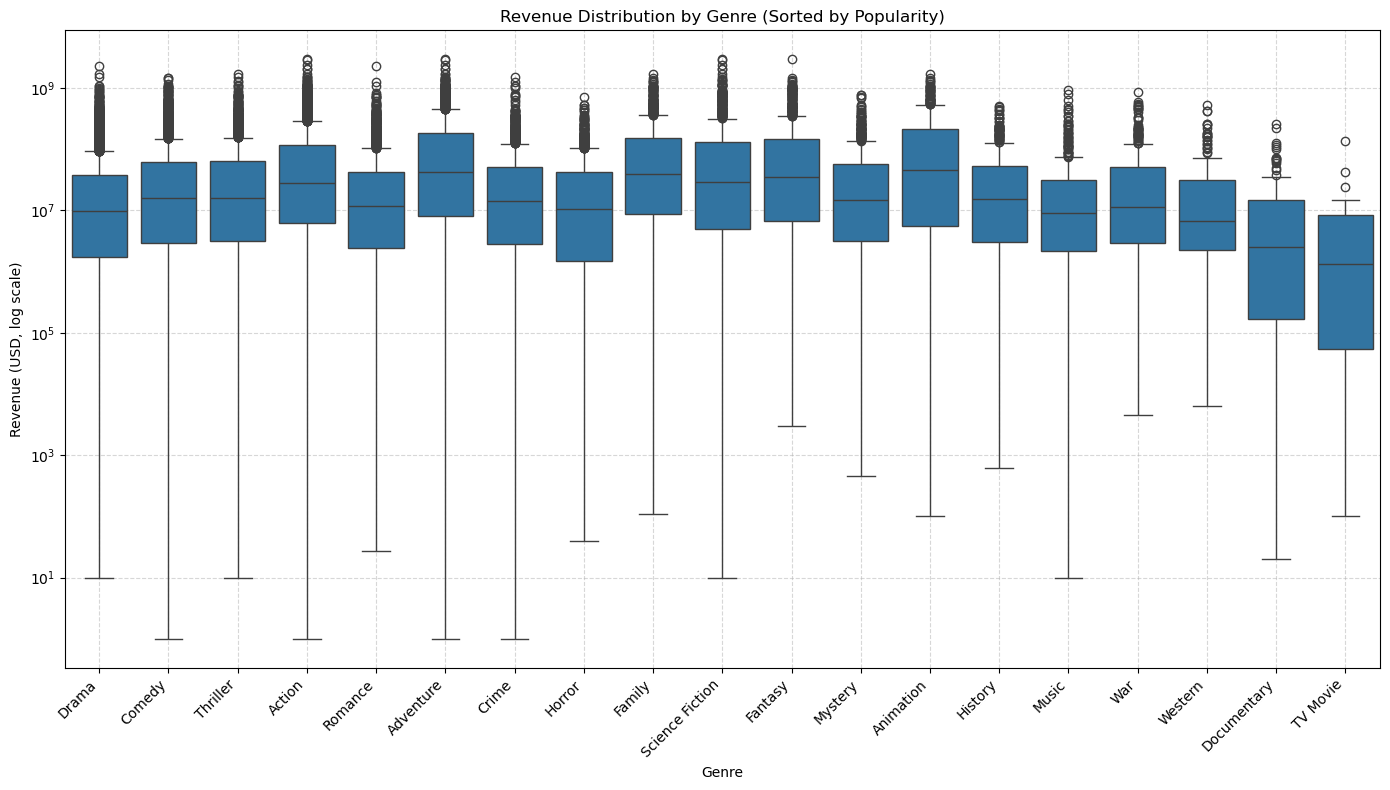

In [140]:
top_genres = data[genre_columns].sum().sort_values(ascending=False)
genre_order = top_genres.index.tolist()

genre_revenue = pd.melt(
    data,
    id_vars=['revenue'],
    value_vars=genre_columns,
    var_name='genre',
    value_name='is_genre'
)

# Keep only True genre associations
genre_revenue = genre_revenue[genre_revenue['is_genre'] == True]

# Step 3: Now plot
plt.figure(figsize=(14,8))
sns.boxplot(
    data=genre_revenue,
    x='genre',
    y='revenue',
    order=genre_order  # <- This sets the correct sorting!
)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.title('Revenue Distribution by Genre (Sorted by Popularity)')
plt.xlabel('Genre')
plt.ylabel('Revenue (USD, log scale)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

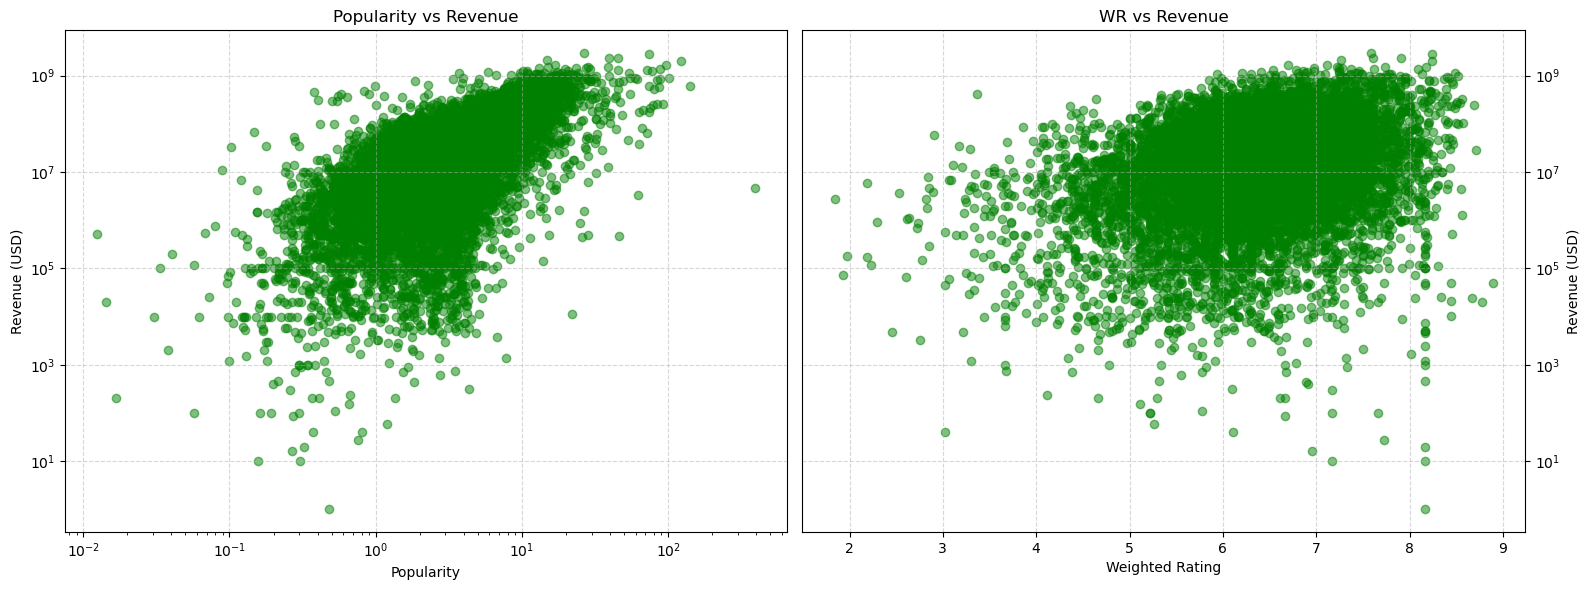

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Popularity vs Revenue (log-log)
axes[0].scatter(data['popularity'], data['revenue'], alpha=0.5, color='green')
axes[0].set_xlabel('Popularity')
axes[0].set_ylabel('Revenue (USD)')
axes[0].set_title('Popularity vs Revenue')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot 2: Weighted Rating vs Revenue (log-y only)
axes[1].scatter(data['weighted_rating'], data['revenue'], alpha=0.5, color='green')
axes[1].set_xlabel('Weighted Rating')
axes[1].set_yscale('log')
axes[1].set_title('WR vs Revenue')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Move y-axis to the right
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
axes[1].set_ylabel('Revenue (USD)')

plt.tight_layout()
plt.show()

#לא פה למעלה 

In [142]:
data.to_csv('tmdb_movies_cleaned.csv', index=False)